# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g., 

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



In [1]:
%config Completer.use_jedi = False
from time import time, ctime

nb_start = time()

print("Note Book Start time:   ", ctime(nb_start))

Note Book Start time:    Tue Apr 20 14:12:35 2021


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  """Entry point for launching an IPython kernel.


In [3]:
!pip install kaggle

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [4]:
!pwd


/root/shared/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission


In [5]:
!mkdir ~/.kaggle
!cp /root/shared/Downloads/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory '/root/.kaggle': File exists


In [5]:
! kaggle competitions files home-credit-default-risk

If running on Google Drive Run below else not

In [2]:
#from google.colab import drive 
#drive.mount('/content/drive',force_remount=True)

#import os 

#os.chdir("/content/drive/My Drive")

'\nfrom google.colab import drive \ndrive.mount(\'/content/drive\',force_remount=True)\n\nimport os \n\nos.chdir("/content/drive/My Drive")\n'

In [ ]:
#!ls

In [8]:
#import pandas as pd
#data = pd.read_csv('/content/drive/My Drive/AML Project/Data/bureau.csv')

In [9]:
data.head(5)

SK_ID_CURR  SK_ID_BUREAU  ... DAYS_CREDIT_UPDATE AMT_ANNUITY
0      215354       5714462  ...               -131         NaN
1      215354       5714463  ...                -20         NaN
2      215354       5714464  ...                -16         NaN
3      215354       5714465  ...                -16         NaN
4      215354       5714466  ...                -21         NaN

[5 rows x 17 columns]

In [10]:
#DATA_DIR='/content/drive/My Drive/AML Project/Data/'

# Dataset Description


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

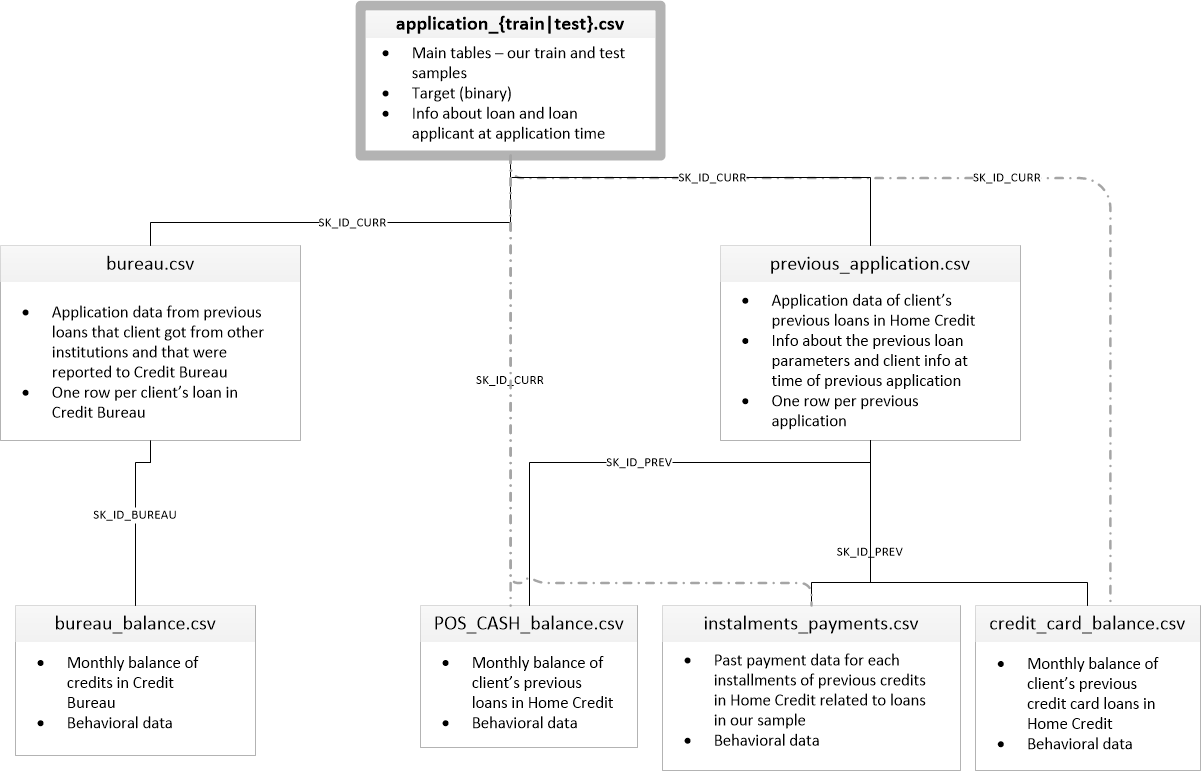

## Download the files via Kaggle API


In [1]:
DATA_DIR = "/root/shared/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission/data"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir $DATA_DIR

mkdir: cannot create directory '/root/shared/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission/data': File exists


In [2]:
!ls -l $DATA_DIR

total 2621364
-rw-r--r-- 1 root root     37383 Apr 18 16:25 HomeCredit_columns_description.csv
-rw-r--r-- 1 root root 392703158 Apr 18 16:26 POS_CASH_balance.csv
-rw-r--r-- 1 root root  26567651 Apr 18 16:26 application_test.csv
-rw-r--r-- 1 root root 166133370 Apr 18 16:26 application_train.csv
-rw-r--r-- 1 root root 170016717 Apr 18 16:26 bureau.csv
-rw-r--r-- 1 root root 375592889 Apr 18 16:27 bureau_balance.csv
-rw-r--r-- 1 root root 424582605 Apr 18 16:27 credit_card_balance.csv
-rw-r--r-- 1 root root 723118349 Apr 18 16:28 installments_payments.csv
-rw-r--r-- 1 root root 404973293 Apr 18 16:28 previous_application.csv
-rw-r--r-- 1 root root    536202 Apr 18 16:28 sample_submission.csv


In [11]:
! kaggle competitions download home-credit-default-risk -p $DATA_DIR

### Imports

In [3]:
%config Completer.use_jedi = False

import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
from time import time, ctime

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss, classification_report, roc_auc_score, make_scorer
from scipy import stats
import json
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [16]:
unzippingReq = False
if unzippingReq: #please modify this code 
    zip_file = DATA_DIR + '/' + 'home-credit-default-risk.zip'
    zip_ref = zipfile.ZipFile(zip_file, 'r')
    zip_ref.extractall(path=DATA_DIR)
    zip_ref.close()

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

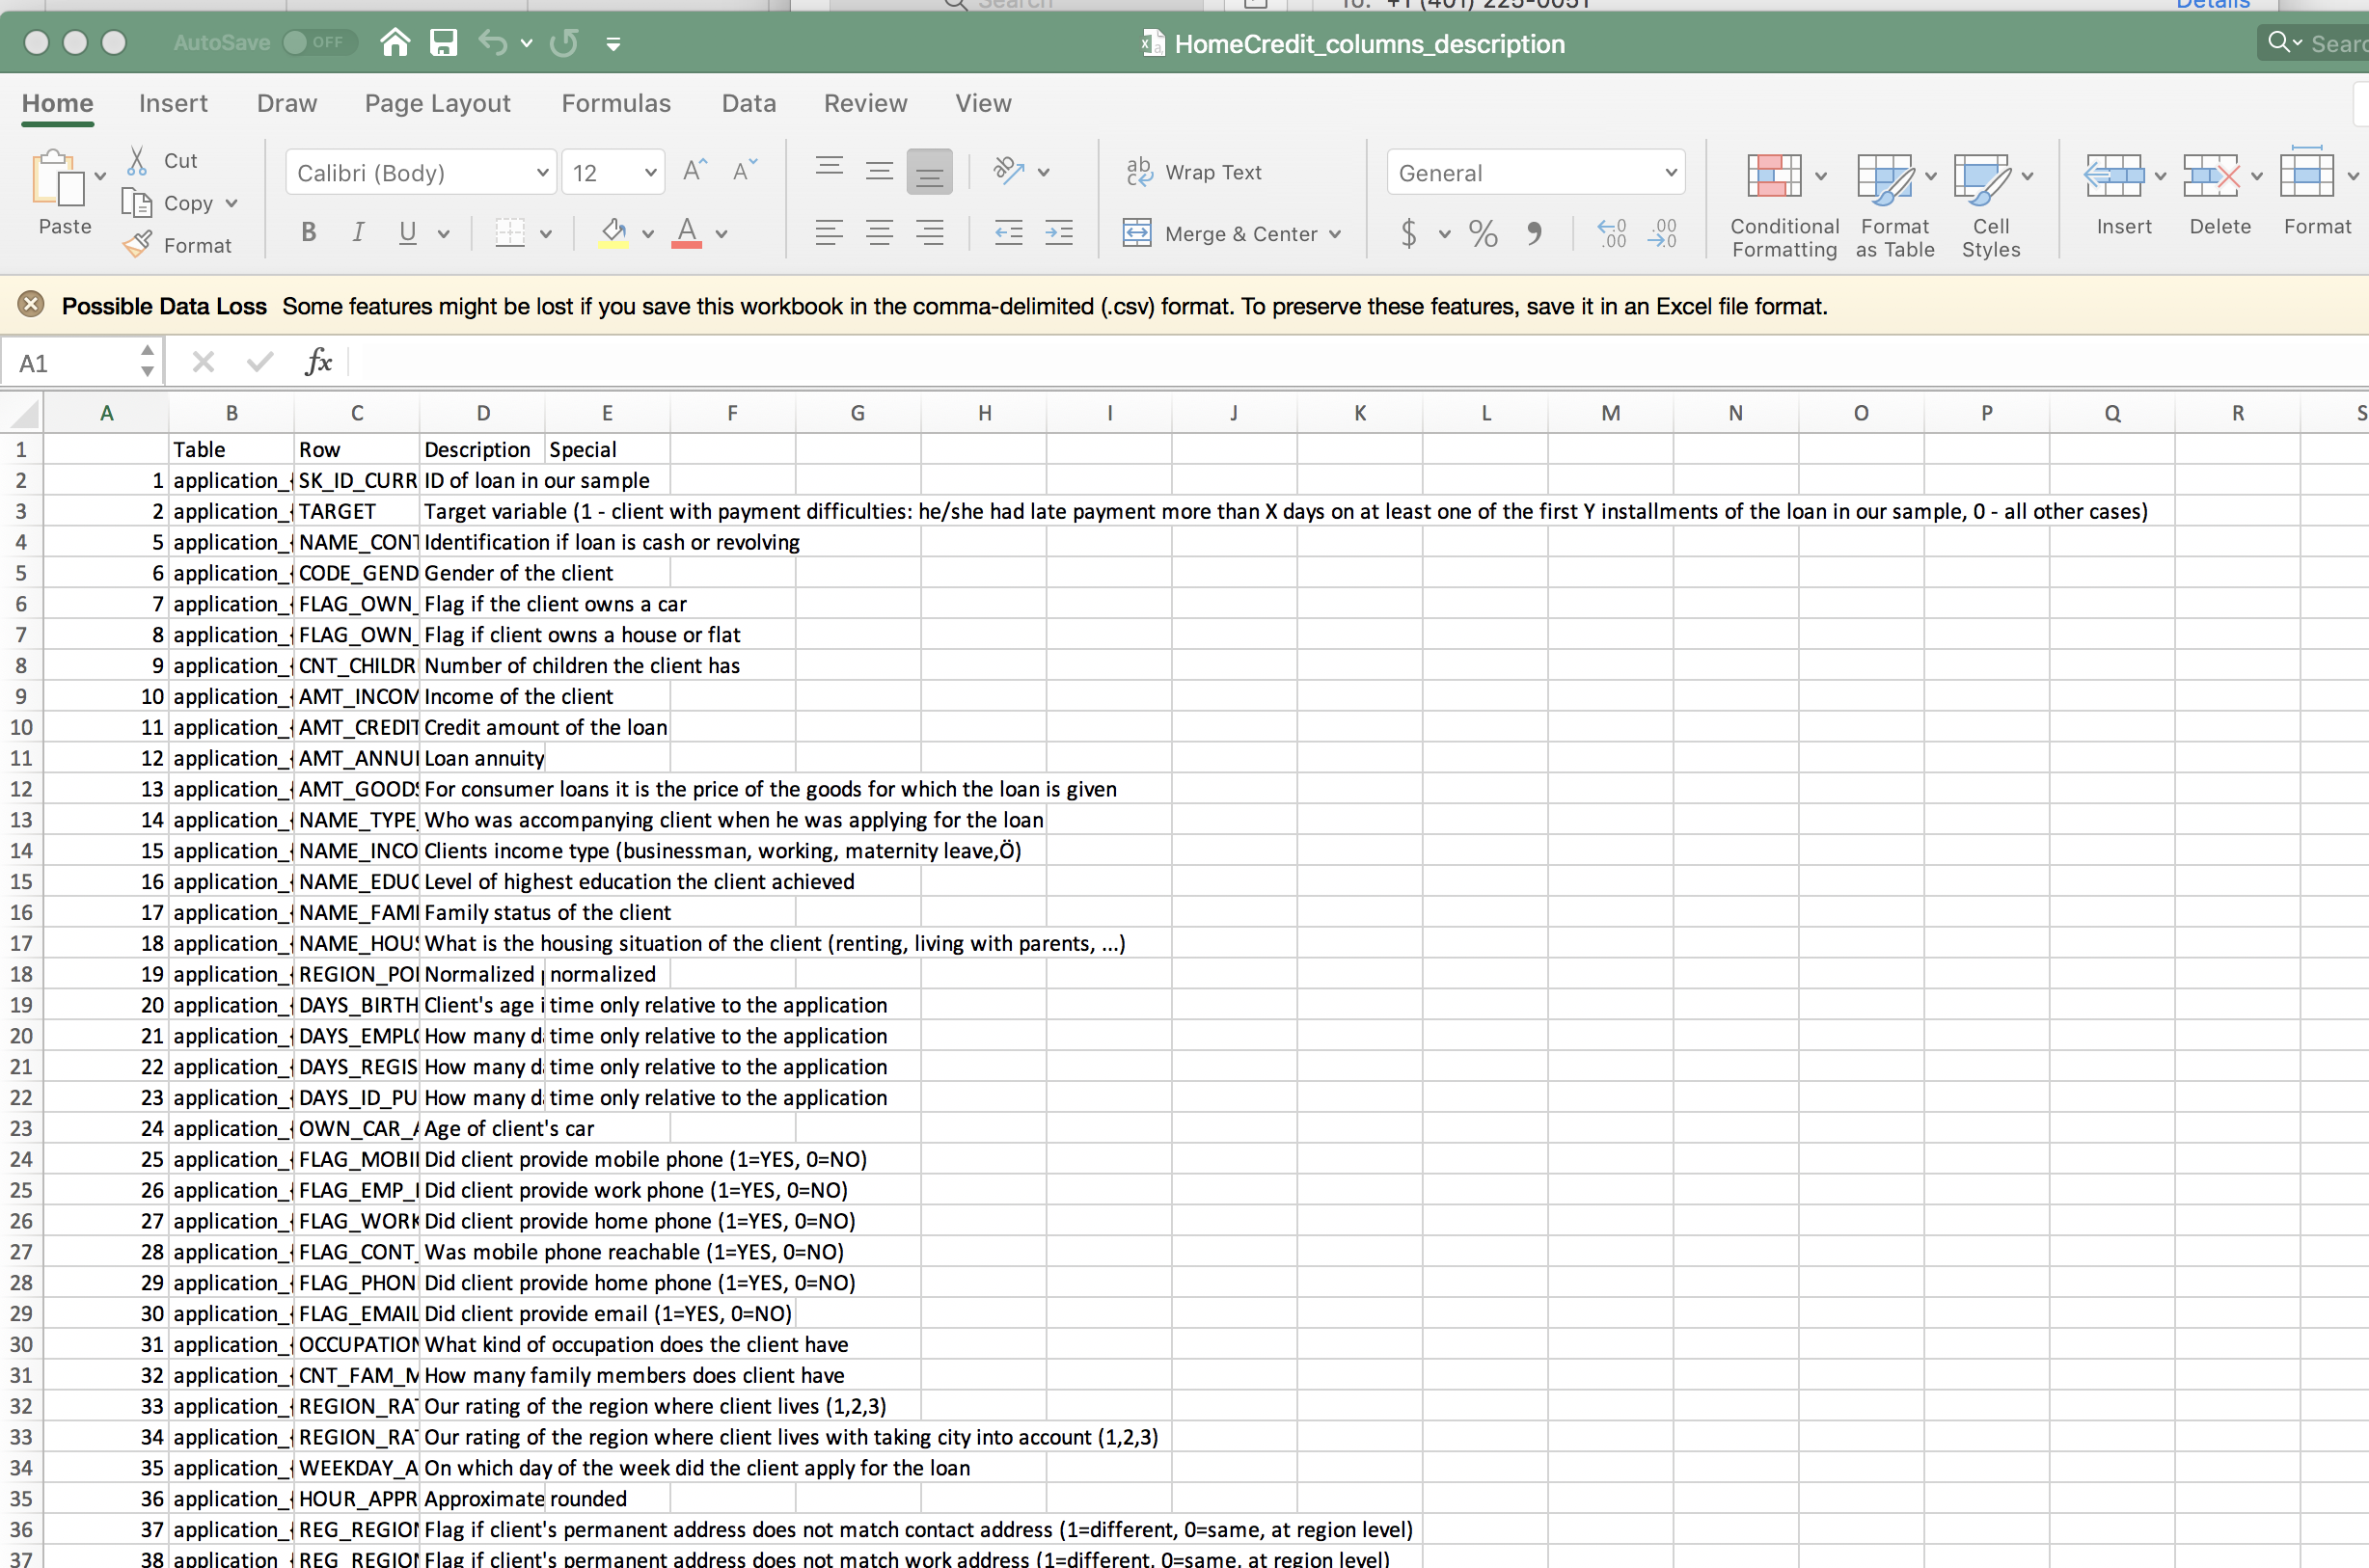

### Application train

In [4]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily


### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [5]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [6]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

CPU times: user 1min 57s, sys: 2min 41s, total: 4min 38s
Wall time: 6min 8s


In [7]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_test        : [     48,744, 121]
dataset application_train       : [    307,511, 122]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis
<a id='EDA Section'></a> 

## Summary Statistics

In [15]:
print('\033[1m' + "Size of each dataset : " + '\033[0m' , end = '\n' * 2)
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]:4}]')

Size of each dataset : 

dataset application_test        : [     48,744,  121]
dataset application_train       : [    307,511,  122]
dataset bureau                  : [  1,716,428,   17]
dataset bureau_balance          : [ 27,299,925,    3]
dataset credit_card_balance     : [  3,840,312,   23]
dataset installments_payments   : [ 13,605,401,    8]
dataset previous_application    : [  1,670,214,   37]
dataset POS_CASH_balance        : [ 10,001,358,    8]


### Summary of Application train

In [13]:
(datasets['application_train'].dtypes).unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [16]:
from IPython.display import display, HTML
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Full stats

def stats_summary1(df, df_name):
    print(datasets[df_name].info(verbose=True, null_counts=True ))
    print("-----"*15)
    print(f"Shape of the df {df_name} is {df.shape} \n")
    print("-----"*15)
    print(f"Statistical summary of {df_name} is :")
    print("-----"*15)
    print(f"Description of the df {df_name}:\n")
    print(display(HTML(np.round(datasets['application_train'].describe(),2).to_html()))) 
    #print(f"Description of the df {df_name}:\n",np.round(datasets['application_train'].describe(),2))

def stats_summary2(df, df_name):   
    print(f"Description of the df continued for {df_name}:\n")
    print("-----"*15)
    print("Data type value counts: \n",df.dtypes.value_counts())
    print("\nReturn number of unique elements in the object. \n")
    print(df.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
    

# List the categorical and Numerical features of a DF
def feature_datatypes_groups(df, df_name):
    df_dtypes = df.columns.to_series().groupby(df.dtypes).groups
    print("-----"*15)
    print(f"Categorical and Numerical(int + float) features  of {df_name}.")
    print("-----"*15)
    print()
    for k, v in df_dtypes.items():
        print({k.name: v})
        print("---"*10)
    print("\n \n")    
        
# Null data list and plot.        
def null_data_plot(df, df_name):
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False).round(2)
    sum_missing = df.isna().sum().sort_values(ascending = False)
    missing_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
    missing_data=missing_data[missing_data['Percent'] > 0] 
    print("-----"*15)
    print("-----"*15)
    print('\n The Missing Data: \n')
#     display(missing_data)  # display few
    if len(missing_data)==0:
      print("No missing Data")
    else:
      display(HTML(missing_data.to_html()))  # display all the rows
      print("-----"*15)
      if len(df.columns)> 35:
        f,ax =plt.subplots(figsize=(8,15))
      else: 
        f,ax =plt.subplots()
      #plt.xticks(rotation='90')
      #fig=sns.barplot(missing_data.index, missing_data["Percent"],alpha=0.8)
      #plt.xlabel('Features', fontsize=15)
      #plt.ylabel('Percent of missing values', fontsize=15)
      plt.title(f'Percent missing data for {df_name}.', fontsize=10)
      fig=sns.barplot(missing_data["Percent"],missing_data.index ,alpha=0.8)
      plt.xlabel('Percent of missing values', fontsize=10)
      plt.ylabel('Features', fontsize=10)
      return missing_data


# Full consolidation of all the stats function.
def display_stats(df, df_name):
    print("--"*40)
    print(" "*20 + '\033[1m'+ df_name +  '\033[0m' +" "*20)
    print("--"*40)
    stats_summary1(df, df_name)

def display_feature_info(df, df_name):
    stats_summary2(df, df_name)
    feature_datatypes_groups(df, df_name)
    null_data_plot(df, df_name)



In [17]:
display_stats(datasets['application_train'], 'application_train')

--------------------------------------------------------------------------------
                    application_train                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT

None


Description of the df continued for application_train:

---------------------------------------------------------------------------
Data type value counts: 
 float64    65
int64      41
object     16
dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of application_train.
------------------------------------------------

---------------------------------------------------------------------------


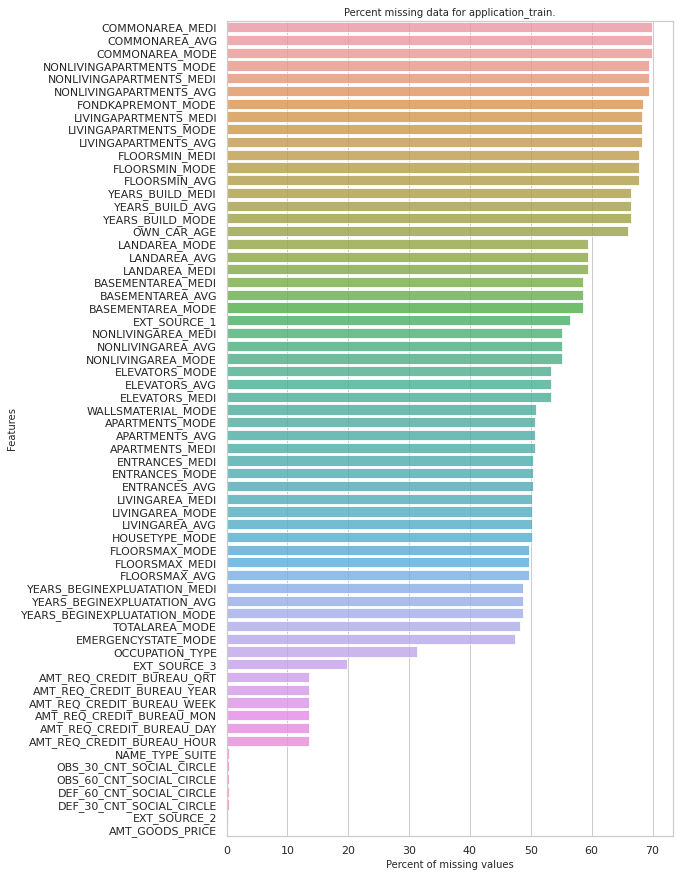

In [44]:
display_feature_info(datasets['application_train'], 'application_train')

#### Observation 1 
- We can see anamolies in the data from the descriptive statistics for Days Birth, Days employed, Days registration, Days Id publish which is a negative value and is not expected. 
- Own car age has a max of 91. 
- There are redundant features related to living space and realty which can be helpful to weed out during the feature eduction process and avoid issues with multicollinearity.

##### Days Employed

In [19]:
datasets["application_train"]['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [20]:
anom_days_employed = datasets["application_train"][datasets["application_train"]['DAYS_EMPLOYED']==365243]
norm_days_employed = datasets["application_train"][datasets["application_train"]['DAYS_EMPLOYED']!=365243]
print(anom_days_employed.shape)

dr_anom = anom_days_employed['TARGET'].mean()*100
dr_norm = norm_days_employed['TARGET'].mean()*100

print('Default rate (Anomaly): {:.2f}'.format(dr_anom))
print('Default rate (Normal): {:.2f}'.format(dr_norm))

pct_anom_days_employed = (anom_days_employed.shape[0]/datasets["application_train"].shape[0])*100
print(pct_anom_days_employed)

(55374, 122)
Default rate (Anomaly): 5.40
Default rate (Normal): 8.66
18.00716071945394


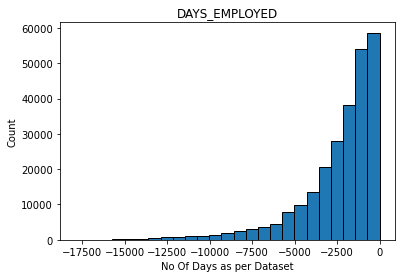

In [21]:
df_app_train=datasets["application_train"].copy()
df_app_train['DAYS_EMPLOYED_ANOM'] = df_app_train['DAYS_EMPLOYED'] == 365243
df_app_train['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)
plt.hist(df_app_train['DAYS_EMPLOYED'],edgecolor = 'k', bins = 25)
plt.title('DAYS_EMPLOYED'); plt.xlabel('No Of Days as per Dataset'); plt.ylabel('Count');

The bins above histogram shows that the data is not logical and this feature needs to be further investigated for imbalances. Number of days employed would show a steady source of income and could be a useful feature for predicting risk

##### Own Car Age

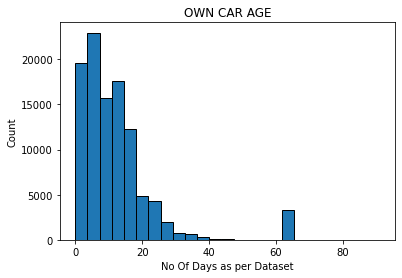

In [22]:
plt.hist(datasets["application_train"]['OWN_CAR_AGE'],edgecolor = 'k', bins = 25)
plt.title('OWN CAR AGE'); plt.xlabel('No Of Days as per Dataset'); plt.ylabel('Count');

We see that those who have cars over 60 years old have a number of applications (i.e., 3339). This could a good area to investigate risk

Description of the df continued for application_train:

---------------------------------------------------------------------------
Data type value counts: 
 float64    65
int64      41
object     16
dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of application_train.
------------------------------------------------

---------------------------------------------------------------------------


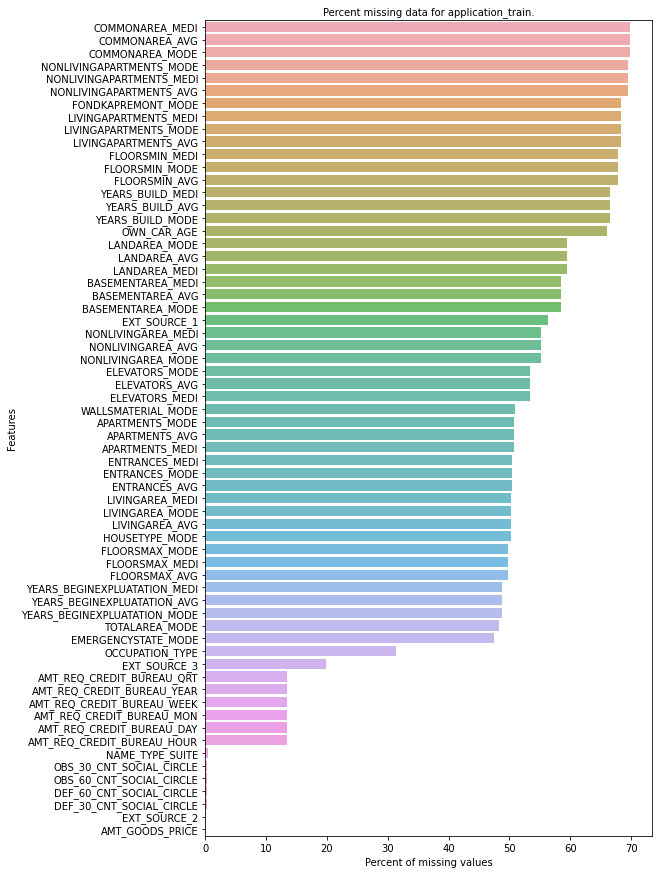

In [23]:
display_feature_info(datasets['application_train'], 'application_train')

#### Observation 2
-  Application Train is the transactional dataset and has the most details regarding the loan requests submitted. 
-  Missing values seem to be of concern in this dataset. Occupation Type and Organization Type are categorical values that have 58 and 18 categories respectively and can be useful in feature engineering.

##### Applicants Age 

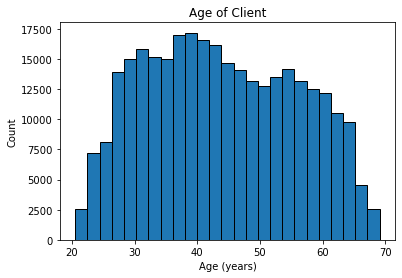

In [28]:
plt.hist(datasets["application_train"]['DAYS_BIRTH']/-365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

##### Applicants occupations

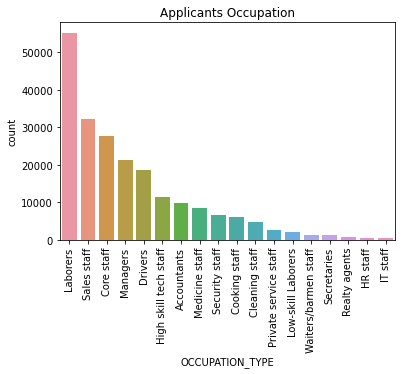

In [29]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"], order = datasets["application_train"]['OCCUPATION_TYPE'].value_counts().index);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

##### Contract Type with Amount Credit and Code Gender

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [25]:
def generic_xy_boxplot(xaxisfeature,yaxisfeature,legendcategory,data,log_scale):
  sns.boxplot(xaxisfeature, yaxisfeature, hue = legendcategory, data = data)
  plt.title('Boxplot for '+ xaxisfeature +' with ' + yaxisfeature+' and '+legendcategory,fontsize=10)
  if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{yaxisfeature} (log Scale)')
                plt.tight_layout()

In [26]:
def box_plot(plots):
  number_of_subplots = len(plots)
  plt.figure(figsize = (20,8))
  sns.set_style('whitegrid')
  for i, ele in enumerate(plots):
        plt.subplot(1, number_of_subplots, i + 1)
        plt.subplots_adjust(wspace=0.25)
        xaxisfeature=ele[0]
        yaxisfeature=ele[1]
        legendcategory=ele[2]
        data=ele[3]
        log_scale=ele[4]
        generic_xy_boxplot(xaxisfeature,yaxisfeature,legendcategory,data,log_scale)

In [27]:
plots=[['NAME_CONTRACT_TYPE','AMT_CREDIT','CODE_GENDER',datasets['application_train'],False]]

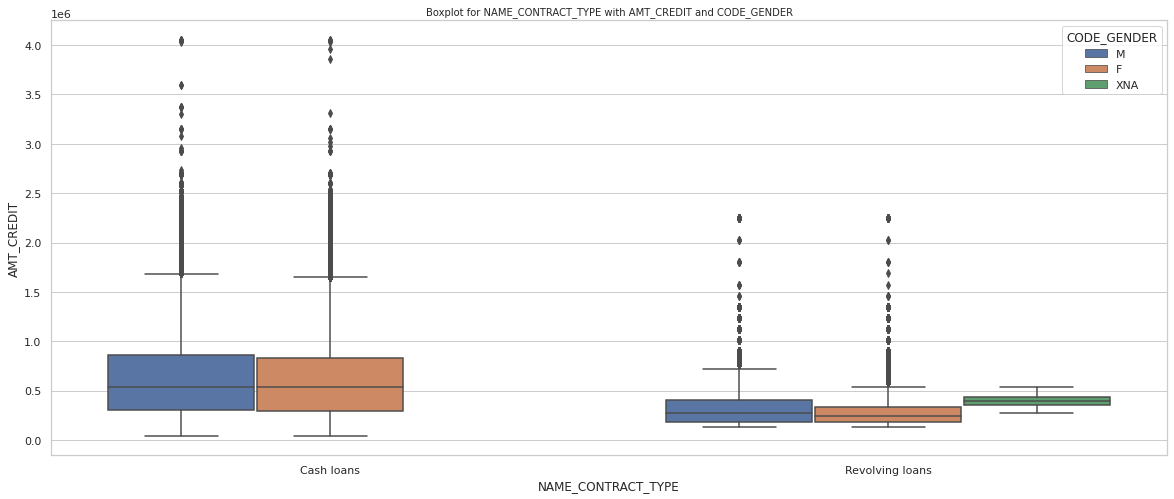

In [28]:
box_plot(plots)

Gender does not indicate a major impact . But credit amount for cash loans are significantly high compared to revolving loans.


### Summary of previous_application

In [29]:
display_stats(datasets['previous_application'], 'previous_application')

--------------------------------------------------------------------------------
                    previous_application                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9  

None


#### Observation 3
-  The count of children go upto 19, this could be an outlier and a risk worth investigating.
-  All no of day fields are negative values showing anamolies in the data. However there are fields indicating average years. A calculation comparing the average years and days could prove valuable

Description of the df continued for previous_application:

---------------------------------------------------------------------------
Data type value counts: 
 object     16
float64    15
int64       6
dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of previous_application.
--------------------------

---------------------------------------------------------------------------


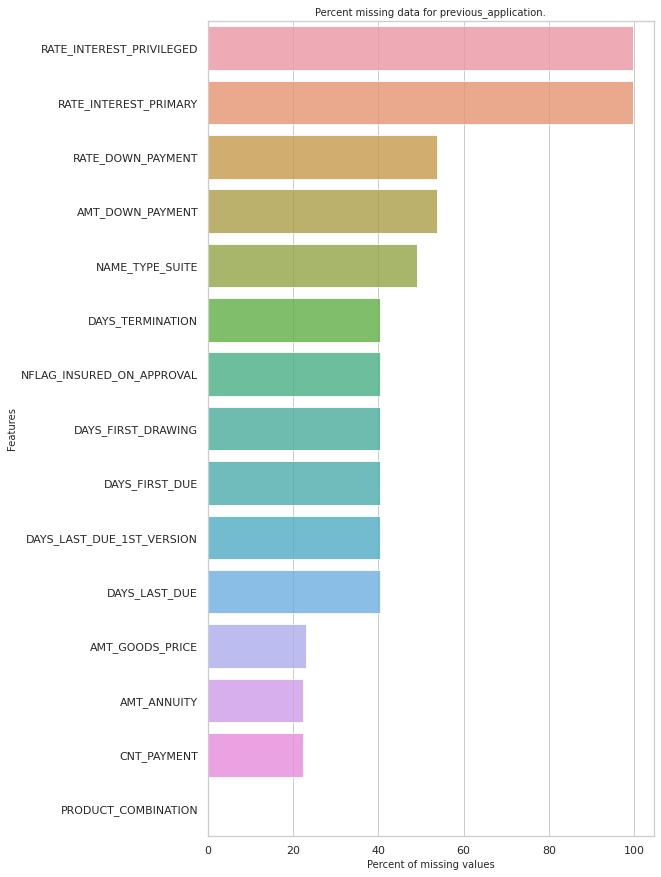

In [30]:
display_feature_info(datasets['previous_application'], 'previous_application')

### Summary of bureau

In [31]:
display_stats(datasets['bureau'], 'bureau')

--------------------------------------------------------------------------------
                    bureau                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1716428 non-null  int64  
 1   SK_ID_BUREAU            1716428 non-null  int64  
 2   CREDIT_ACTIVE           1716428 non-null  object 
 3   CREDIT_CURRENCY         1716428 non-null  object 
 4   DAYS_CREDIT             1716428 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1716428 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     1610875 non-null  float64
 7   DAYS_ENDDATE_FACT       1082775 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  591940 non-null   float64
 9   CNT_CREDIT_PROLONG      1716428 non-null  int64  
 10  AMT_CREDIT_SU

None


Description of the df continued for bureau:

---------------------------------------------------------------------------
Data type value counts: 
 float64    8
int64      6
object     3
dtype: int64

Return number of unique elements in the object. 

CREDIT_ACTIVE       4
CREDIT_CURRENCY     4
CREDIT_TYPE        15
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of bureau.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'CNT_CREDIT_PROLONG', 'DAYS_CREDIT_UPDATE'],
      dtype='object')}
------------------------------
{'float64': Index(['DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY'],
      dtype='object')}
------------------------------
{'ob

---------------------------------------------------------------------------


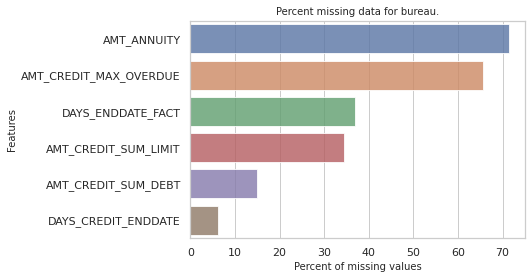

In [32]:
display_feature_info(datasets['bureau'], 'bureau')

### Summary of bureau_balance

In [33]:
display_stats(datasets['bureau_balance'], 'bureau_balance')

--------------------------------------------------------------------------------
                    bureau_balance                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   SK_ID_BUREAU    27299925 non-null  int64 
 1   MONTHS_BALANCE  27299925 non-null  int64 
 2   STATUS          27299925 non-null  object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None
---------------------------------------------------------------------------
Shape of the df bureau_balance is (27299925, 3) 

---------------------------------------------------------------------------
Statistical summary of bureau_balance is :
---------------------------------------------------------------------------
Description of the df bureau_balance:



None


In [40]:
display_feature_info(datasets['bureau_balance'], 'bureau_balance')

Description of the df continued for bureau_balance:

---------------------------------------------------------------------------
Data type value counts: 
 int64     2
object    1
dtype: int64

Return number of unique elements in the object. 

STATUS    8
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of bureau_balance.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_BUREAU', 'MONTHS_BALANCE'], dtype='object')}
------------------------------
{'object': Index(['STATUS'], dtype='object')}
------------------------------

 

---------------------------------------------------------------------------
---------------------------------------------------------------------------

 The Missing Data: 

No missing Data


#### Observation 4
- Bureau balance & bureau have no missing data. These datasets can provide accurate aggreagte features.

### Summary of credit_card_balance

In [34]:
display_stats(datasets['credit_card_balance'], 'credit_card_balance')

--------------------------------------------------------------------------------
                    credit_card_balance                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_PREV                  3840312 non-null  int64  
 1   SK_ID_CURR                  3840312 non-null  int64  
 2   MONTHS_BALANCE              3840312 non-null  int64  
 3   AMT_BALANCE                 3840312 non-null  float64
 4   AMT_CREDIT_LIMIT_ACTUAL     3840312 non-null  int64  
 5   AMT_DRAWINGS_ATM_CURRENT    3090496 non-null  float64
 6   AMT_DRAWINGS_CURRENT        3840312 non-null  float64
 7   AMT_DRAWINGS_OTHER_CURRENT  3090496 non-null  float64
 8   AMT_DRAWINGS_POS_CURRENT    3090496 non-null  float64
 9   AMT_INST_MI

None


Description of the df continued for credit_card_balance:

---------------------------------------------------------------------------
Data type value counts: 
 float64    15
int64       7
object      1
dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_STATUS    7
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of credit_card_balance.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL',
       'CNT_DRAWINGS_CURRENT', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')}
------------------------------
{'float64': Index(['AMT_BALANCE', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT',
       'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT',
       'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT',
       'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL

---------------------------------------------------------------------------


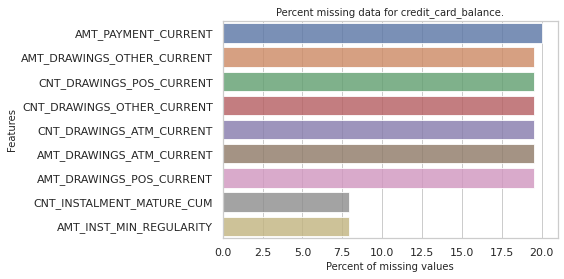

In [35]:
display_feature_info(datasets['credit_card_balance'], 'credit_card_balance')

### Summary of installments_payments

In [37]:
display_stats(datasets['installments_payments'], 'installments_payments')

--------------------------------------------------------------------------------
                    installments_payments                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Non-Null Count     Dtype  
---  ------                  --------------     -----  
 0   SK_ID_PREV              13605401 non-null  int64  
 1   SK_ID_CURR              13605401 non-null  int64  
 2   NUM_INSTALMENT_VERSION  13605401 non-null  float64
 3   NUM_INSTALMENT_NUMBER   13605401 non-null  int64  
 4   DAYS_INSTALMENT         13605401 non-null  float64
 5   DAYS_ENTRY_PAYMENT      13602496 non-null  float64
 6   AMT_INSTALMENT          13605401 non-null  float64
 7   AMT_PAYMENT             13602496 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None
---------------------------------------------

None


Description of the df continued for installments_payments:

---------------------------------------------------------------------------
Data type value counts: 
 float64    5
int64      3
dtype: int64

Return number of unique elements in the object. 

Series([], dtype: float64)
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of installments_payments.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_NUMBER'], dtype='object')}
------------------------------
{'float64': Index(['NUM_INSTALMENT_VERSION', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')}
------------------------------

 

---------------------------------------------------------------------------
---------------------------------------------------------------------------

 The Missing Data: 



---------------------------------------------------------------------------


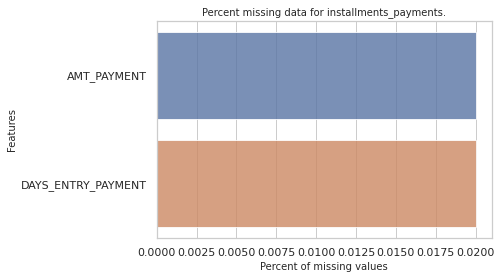

In [38]:
display_feature_info(datasets['installments_payments'], 'installments_payments')

### Summary of POS_CASH_balance

In [39]:
display_stats(datasets['POS_CASH_balance'], 'POS_CASH_balance')

--------------------------------------------------------------------------------
                    POS_CASH_balance                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Non-Null Count     Dtype  
---  ------                 --------------     -----  
 0   SK_ID_PREV             10001358 non-null  int64  
 1   SK_ID_CURR             10001358 non-null  int64  
 2   MONTHS_BALANCE         10001358 non-null  int64  
 3   CNT_INSTALMENT         9975287 non-null   float64
 4   CNT_INSTALMENT_FUTURE  9975271 non-null   float64
 5   NAME_CONTRACT_STATUS   10001358 non-null  object 
 6   SK_DPD                 10001358 non-null  int64  
 7   SK_DPD_DEF             10001358 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None
------------------------------------------------

None


Description of the df continued for POS_CASH_balance:

---------------------------------------------------------------------------
Data type value counts: 
 int64      5
float64    2
object     1
dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_STATUS    9
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of POS_CASH_balance.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'SK_DPD', 'SK_DPD_DEF'], dtype='object')}
------------------------------
{'float64': Index(['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE'], dtype='object')}
------------------------------
{'object': Index(['NAME_CONTRACT_STATUS'], dtype='object')}
------------------------------

 

---------------------------------------------------------------------------
------------------------------------------------------------

---------------------------------------------------------------------------


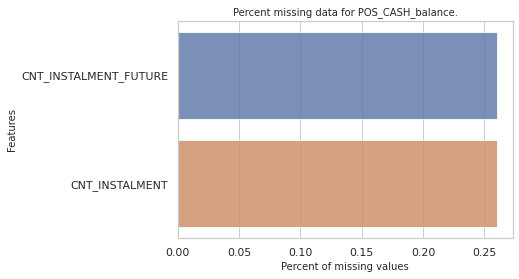

In [40]:
display_feature_info(datasets['POS_CASH_balance'], 'POS_CASH_balance')

### Summary of application_test

In [41]:
display_stats(datasets['application_test'], 'application_test')

--------------------------------------------------------------------------------
                    application_test                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    48744 non-null  int64  
 1   NAME_CONTRACT_TYPE            48744 non-null  object 
 2   CODE_GENDER                   48744 non-null  object 
 3   FLAG_OWN_CAR                  48744 non-null  object 
 4   FLAG_OWN_REALTY               48744 non-null  object 
 5   CNT_CHILDREN                  48744 non-null  int64  
 6   AMT_INCOME_TOTAL              48744 non-null  float64
 7   AMT_CREDIT                    48744 non-null  float64
 8   AMT_ANNUITY                   48720 non-null  float64
 9   AMT_GOODS_PRICE  

None


Description of the df continued for application_test:

---------------------------------------------------------------------------
Data type value counts: 
 float64    65
int64      40
object     16
dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of application_test.
--------------------------------------------------

---------------------------------------------------------------------------


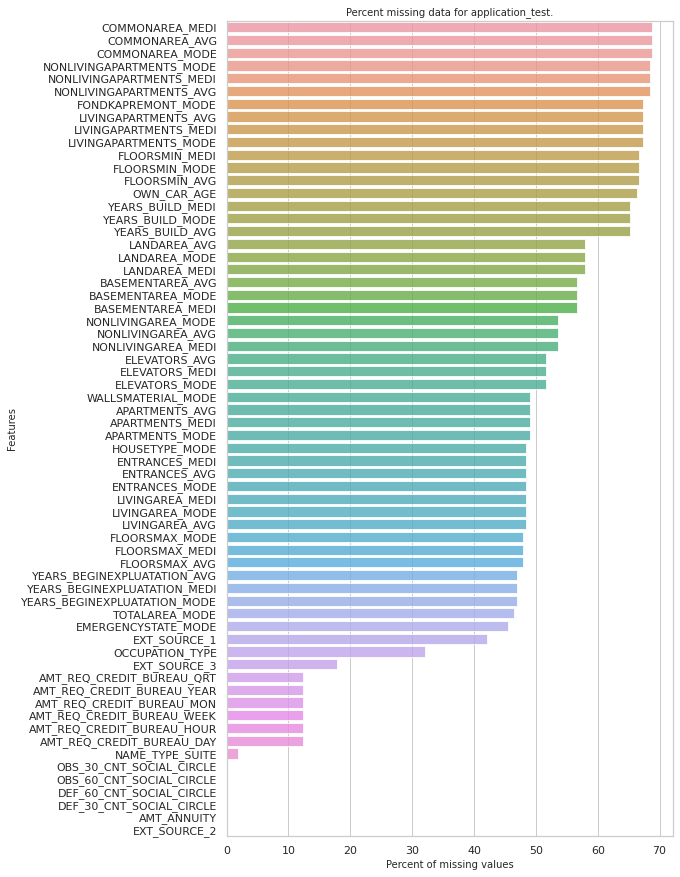

In [42]:
display_feature_info(datasets['application_test'], 'application_test')

## Correlation Analysis
<a id='correlation'></a> 

The top 20 correlated features (positive and negative) for application train datset are listed below. 

In [45]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


In [79]:
num_attribs = ['TARGET', 'AMT_INCOME_TOTAL',  'AMT_CREDIT', 'DAYS_EMPLOYED',
               'DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_GOODS_PRICE']
df = datasets["application_train"].copy()
df2 = df[num_attribs]
corr = df2.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

##  Distribution of the Datasets

The distribution of the top correlated features are plotted below

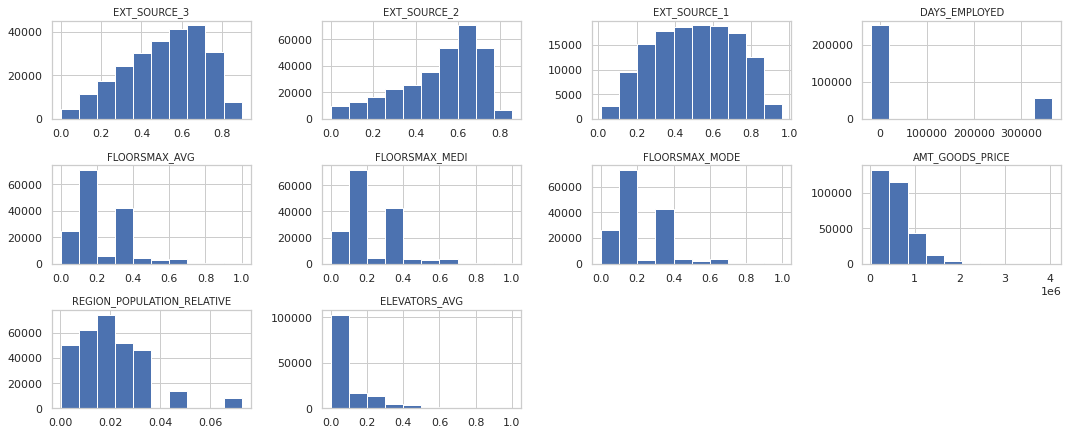

In [46]:
var_neg_corr = correlations.head(10).index.values
numVar = var_neg_corr.shape[0]

plt.figure(figsize=(15,20))
for i,var in enumerate(var_neg_corr):    
    dflt_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==1,var]
    dflt_non_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==0,var]
    
    plt.subplot(numVar,4,i+1)
    datasets["application_train"][var].hist()
    plt.title(var, fontsize = 10)
    plt.tight_layout()
plt.show()

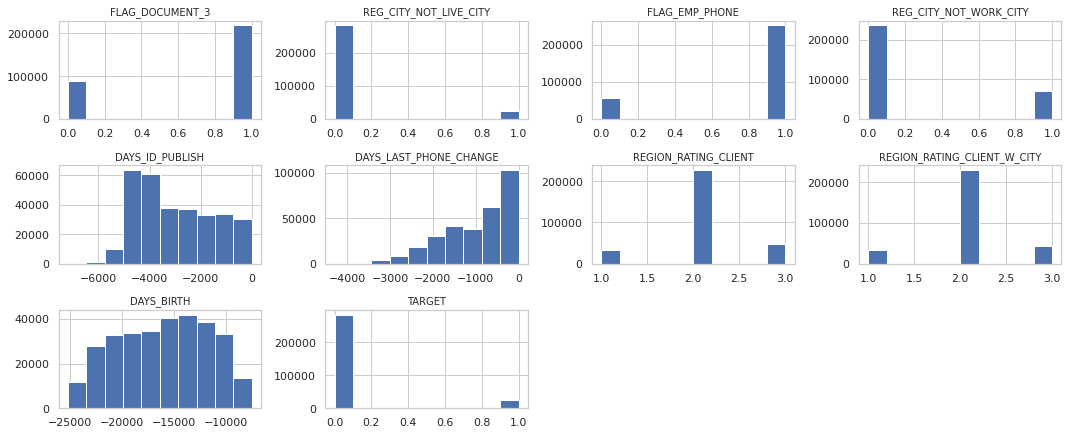

In [47]:
var_pos_corr = correlations.tail(10).index.values
numVar = var_pos_corr.shape[0]

plt.figure(figsize=(15,20))
for i,var in enumerate(var_pos_corr):    
    dflt_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==1,var]
    dflt_non_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==0,var]
    
    plt.subplot(numVar,4,i+1)
    datasets["application_train"][var].hist()
    plt.title(var, fontsize = 10)
    plt.tight_layout()
plt.show()

### Observation 5
- Historgrams used to plot the distribution of the highly correlated variables

In [48]:
def cat_features_plot(datasets, df_name):
    df = datasets[df_name].copy()
    df['TARGET'].replace(0, "No Default", inplace=True)
    df['TARGET'].replace(1, "Default", inplace=True)

#     df.select_dtypes('object')
    categorical_col = []
    
    for col in df:
        if df[col].dtype == 'object':
            categorical_col.append(col)

    # print("The numerical olumns are: \n \n ",numerical_col)
    #print("The categorical columns are: \n \n ",categorical_col)

    # categorical_col = categorical_col[0:8]
    #print(int(len(categorical_col)))
    plot_x = int(len(categorical_col)/2)
    fig, ax = plt.subplots(plot_x, 2, figsize=(20, 50))
    #plt.subplots_adjust(left=None, bottom=None, right=None,
                        #top=None, wspace=None, hspace=0.45)

    num = 0
    for i in range(0, 8):
        for j in range(0,2):
            tst = sns.countplot(x=categorical_col[num],
                               data=df, hue='TARGET', ax=ax[i][j])
            tst.set_title(f"Distribution of the {categorical_col[num]}  Variable.")
            tst.set_xticklabels(tst.get_xticklabels(), rotation=90)
            plt.subplots_adjust(left=None, bottom=None, right=None,
                        top=None, wspace=None, hspace=0.45)
            num = num + 1
            plt.tight_layout()

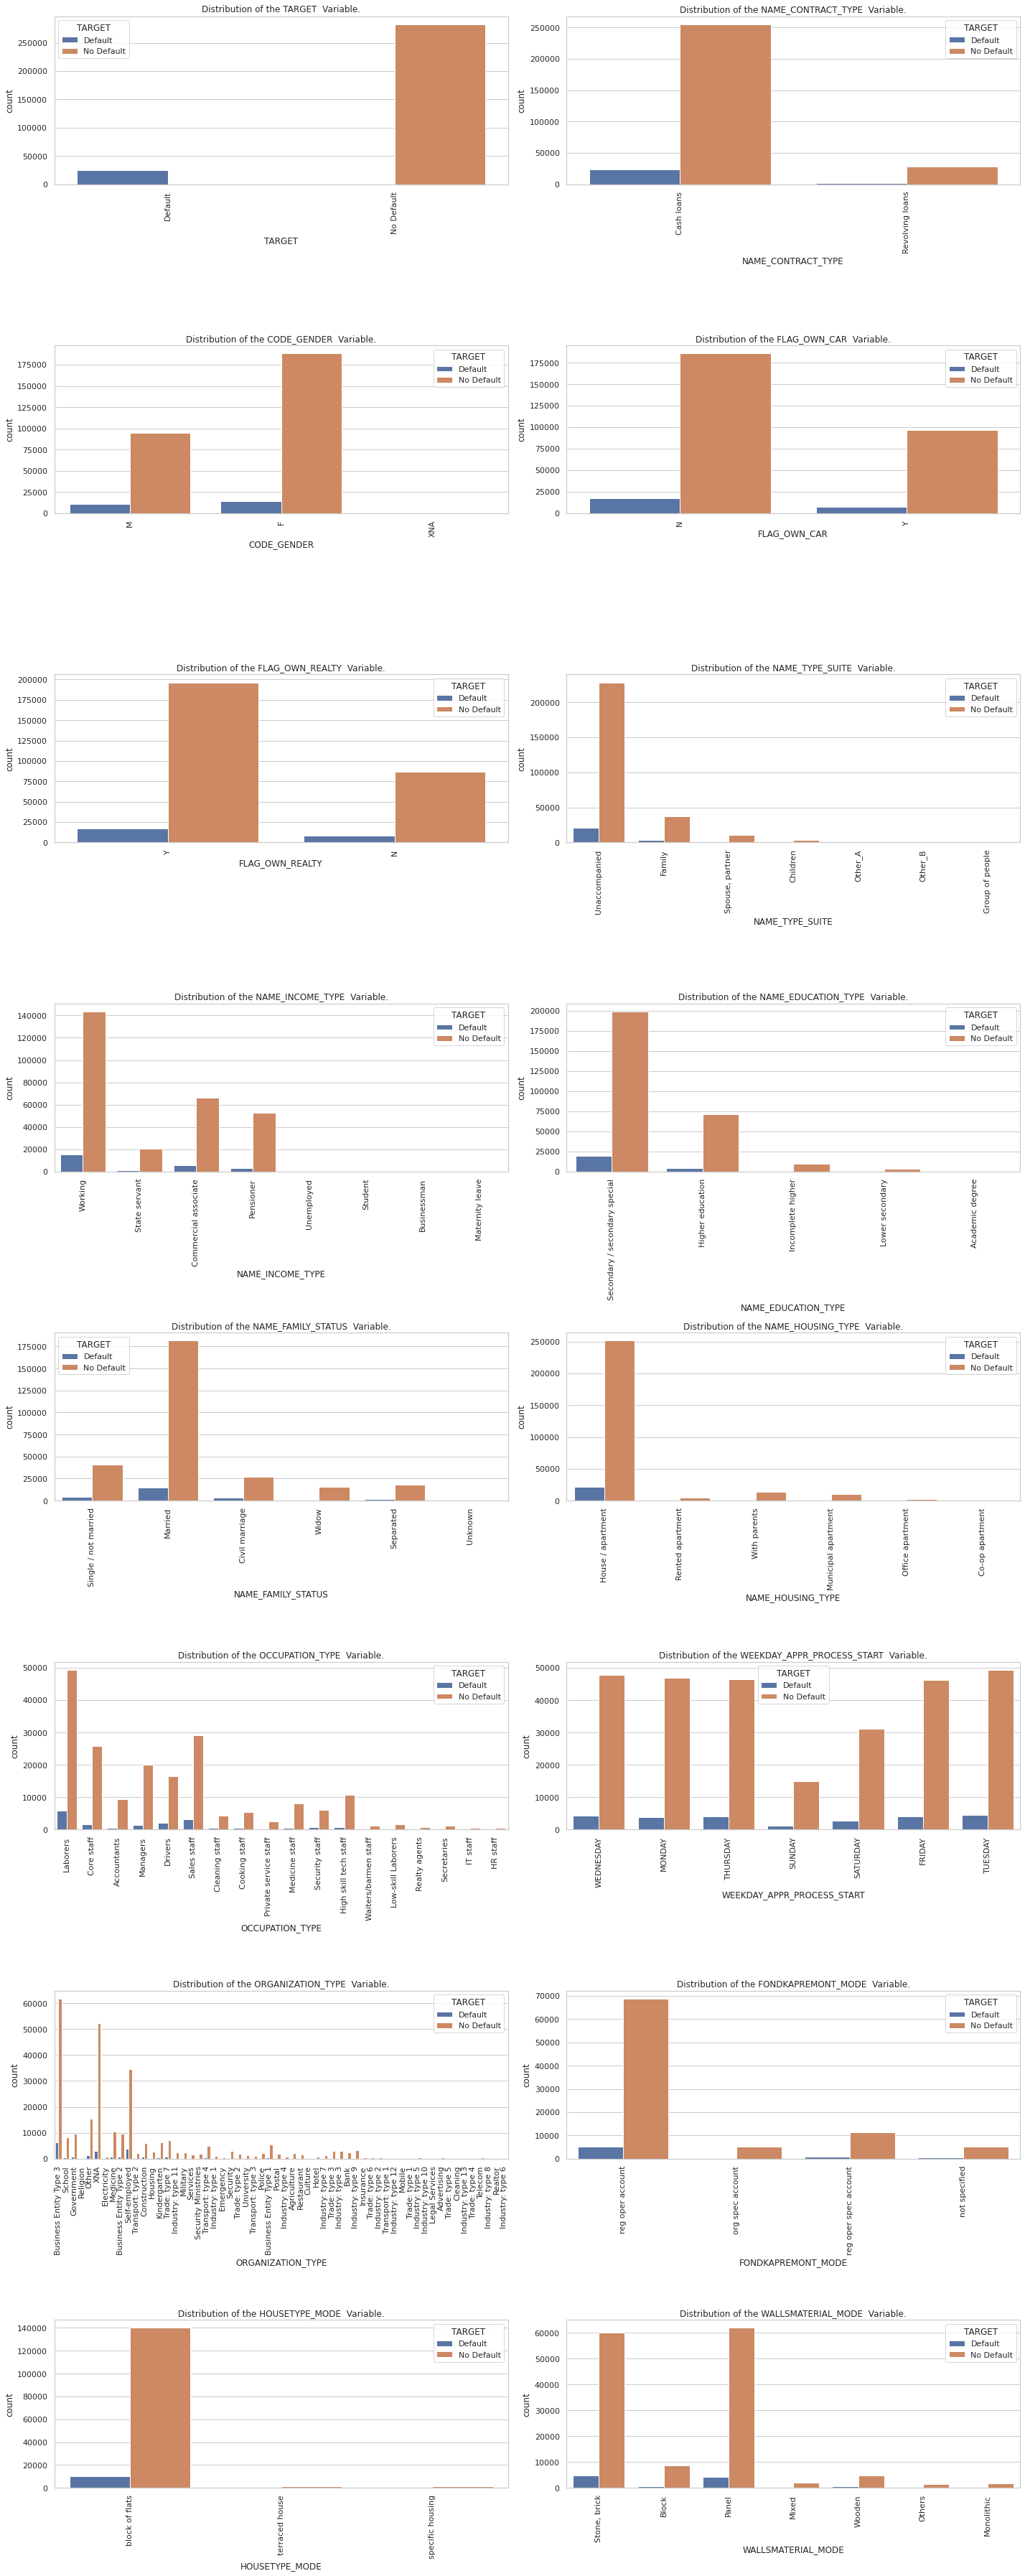

In [54]:
cat_features_plot(datasets, "application_train")

### Observation 6
-  Defaulters among the highly categorical features are seen in most, highlighting Organization Type, Family Type , Occupation Type & Education. 

In [49]:
def numerical_features_plot(datasets, df_name):
    df = datasets[df_name].copy()
    df['TARGET'].replace(0, "No Default", inplace=True)
    df['TARGET'].replace(1, "Default", inplace=True)

    numerical_col = []
    for col in df:
        if df[col].dtype == 'int64' or df[col].dtype == 'float64' :
            numerical_col.append(col)
    print(numerical_col)
    print(len(numerical_col))
    
#     num_attribs = ['TARGET', 'AMT_INCOME_TOTAL',  'AMT_CREDIT', 'DAYS_EMPLOYED',
#                    'DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_GOODS_PRICE']
    df2 = df[numerical_col]
    
    # Scatter-plot
    df2.fillna(0, inplace=True)
#    print('Numerical variables - Scatter-Matrix')
    grr = pd.plotting.scatter_matrix(df2.loc[:, df2.columns != 'TARGET'], c = datasets[df_name]['TARGET'], figsize=(15, 15), marker='.',
                        hist_kwds={'bins': 10}, s=60, alpha=.2)


    # Pair-plot
    df2['TARGET'].replace(0, "No Default", inplace=True)
    df2['TARGET'].replace(1, "Default", inplace=True)
#    print('Numerical variables - Pair-Plot')    
    num_sns = sns.pairplot(df2, hue="TARGET", markers=["s", "o"])

    #    num_sns.title("Numerical variables - Pair-Plot")



# numerical_features_plot(datasets, "application_train")


# correlation
# head(10)
# tail(10)
# numerical()
# create the scatter plot and pairwise plot

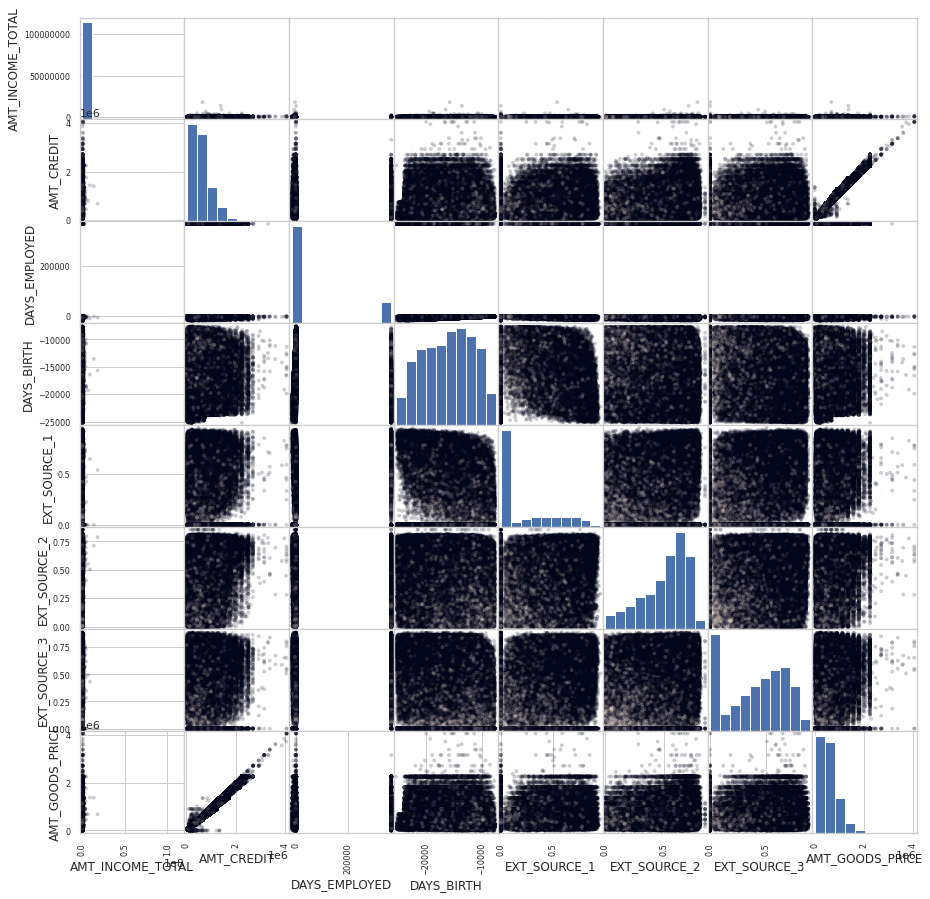

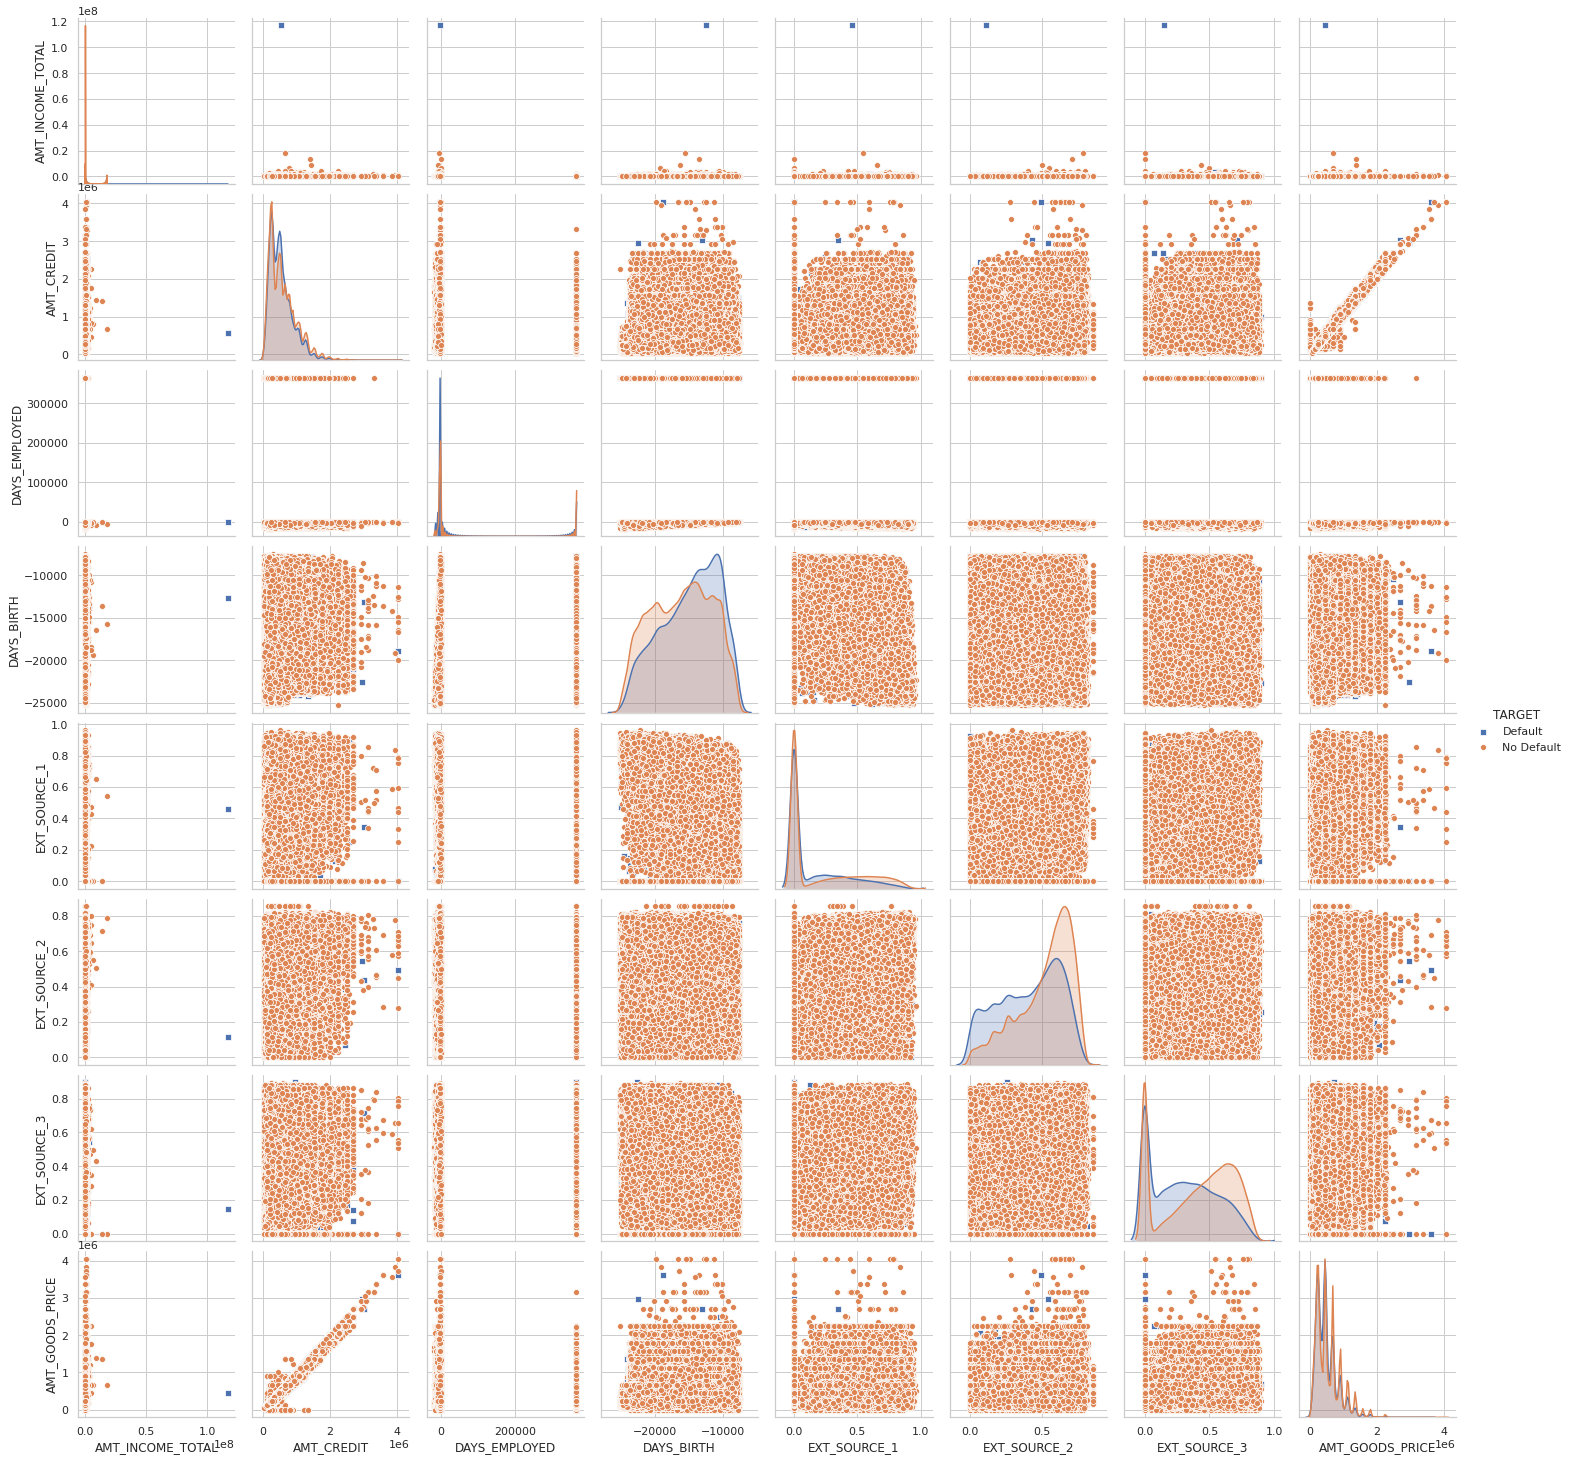

In [56]:
run = True
if run: 
    df_name = 'application_train'
    num_attribs = ['TARGET', 'AMT_INCOME_TOTAL',  'AMT_CREDIT', 'DAYS_EMPLOYED',
                       'DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_GOODS_PRICE']
    df = datasets[df_name].copy()
    df2 = df[num_attribs]

    # Scatter-plot
    df2.fillna(0, inplace=True)
    #    print('Numerical variables - Scatter-Matrix')
    grr = pd.plotting.scatter_matrix(df2.loc[:, df2.columns != 'TARGET'], 
                                     c = datasets[df_name]['TARGET'], 
                                     figsize=(15, 15), marker='.',
                                hist_kwds={'bins': 10}, s=60, alpha=.2)


    # Pair-plot
    df2['TARGET'].replace(0, "No Default", inplace=True)
    df2['TARGET'].replace(1, "Default", inplace=True)
    #    print('Numerical variables - Pair-Plot')    
    num_sns = sns.pairplot(df2, hue="TARGET", markers=["s", "o"])

    #    num_sns.title("Numerical variables - Pair-Plot")

### Observation 7
**Correlation Map of Numerical Variables**

* Strong correlation between amount credit and amount goods price
* Strong correlation between days birth and days employed
* strong correlation between ext source 1 and days birth
* These might be good candidates to do some feature engineering in.

In [50]:
num_attribs = ['TARGET', 'AMT_INCOME_TOTAL',  'AMT_CREDIT', 'DAYS_EMPLOYED',
               'DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_GOODS_PRICE']
df = datasets["application_train"].copy()
df2 = df[num_attribs]
corr = df2.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

## Density Plots

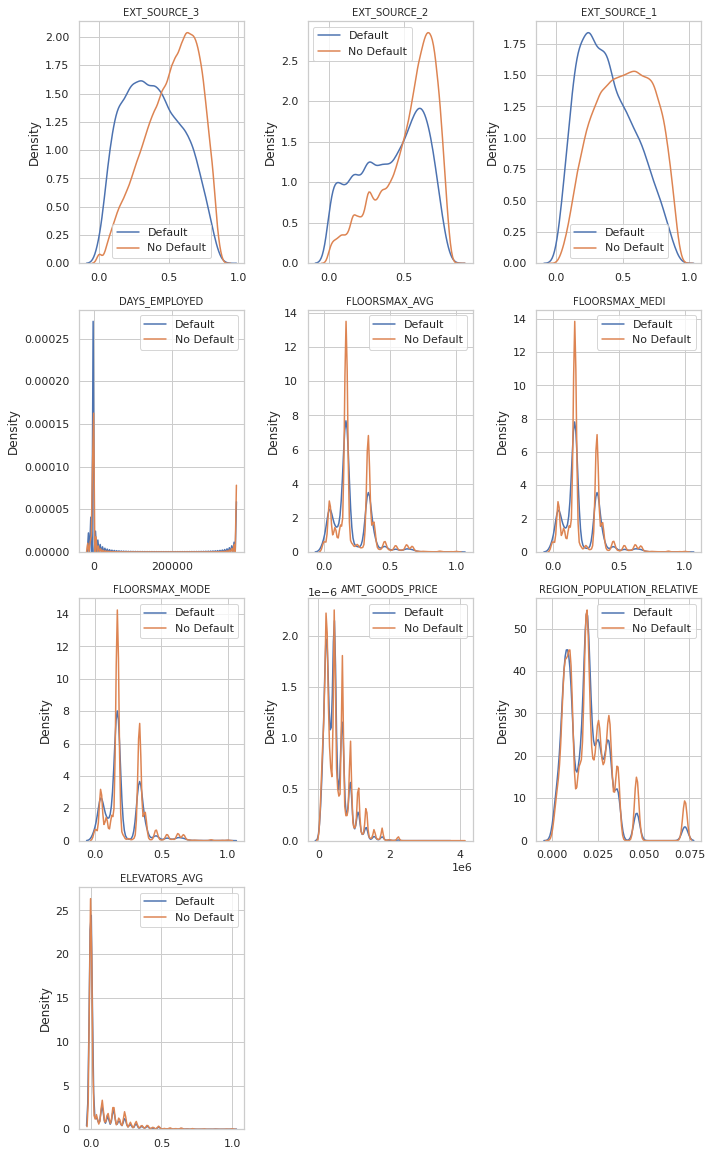

In [51]:
var_neg_corr = correlations.head(10).index.values
numVar = var_neg_corr.shape[0]

plt.figure(figsize=(10,40))
for i,var in enumerate(var_neg_corr):    
    dflt_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==1,var]
    dflt_non_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==0,var]
    
    plt.subplot(numVar,3,i+1)
    plt.subplots_adjust(wspace=2)
    sns.kdeplot(dflt_var,label='Default')
    sns.kdeplot(dflt_non_var,label='No Default')
    #plt.xlabel(var)
    plt.ylabel('Density')
    plt.title(var, fontsize = 10)
    plt.tight_layout()
plt.show()

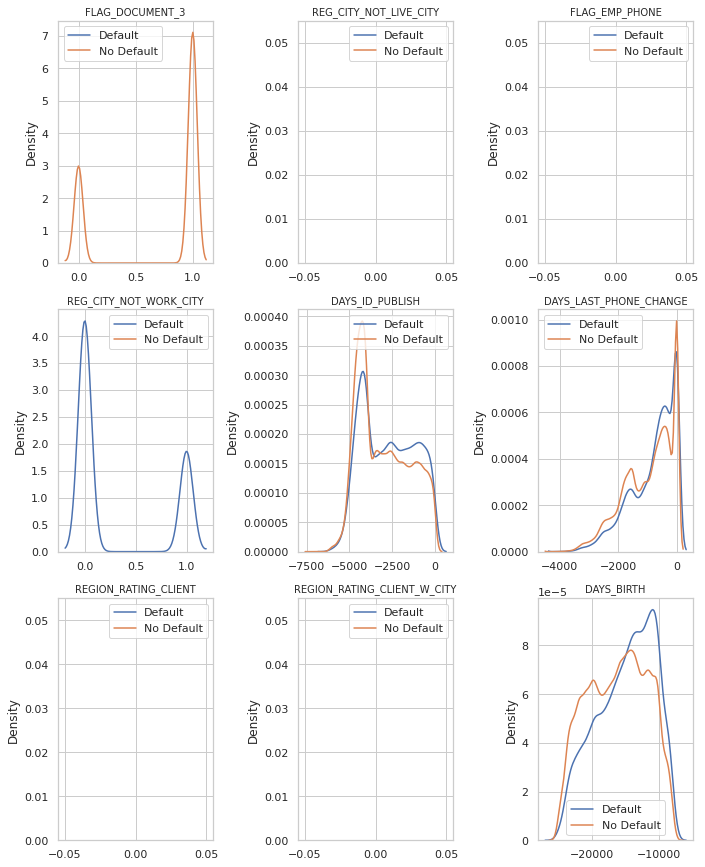

In [52]:
var_pos_corr = correlations.tail(10).index.values
numVar = var_pos_corr.shape[0]

plt.figure(figsize=(10,40))
for i,var in enumerate(var_pos_corr):    
    dflt_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==1,var]
    dflt_non_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==0,var]
    if var=='TARGET':
      pass
    else:
      plt.subplot(numVar,3,i+1)
      plt.subplots_adjust(wspace=2)
      sns.kdeplot(dflt_var,label='Default')
      sns.kdeplot(dflt_non_var,label='No Default')
      #plt.xlabel(var)
      plt.ylabel('Density')
      plt.title(var, fontsize = 10)
      plt.tight_layout()
plt.show()

### Observation 8

- We plot the KDEs of the most positively (negatively) correlated features with the TARGET. This is to evaluate whether there are any strange distributions between the default and do not default items.

- If the distributions for each feature are very different for default and do not default, this is good and we should look out for this. So we can see that EXT_SOURCE_3 has the most different distributions between default and no default.

# Dataset questions
## Unique record for each SK_ID_CURR
Validating primary key for the datasets

In [7]:
datasets.keys()

dict_keys(['application_test', 'application_train', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

In [8]:
len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]

True

In [9]:
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

In [10]:
datasets["application_test"].shape

(48744, 121)

In [11]:
datasets["application_train"].shape

(307511, 122)

## previous applications for the submission file
The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [8]:
appsDF = datasets["previous_application"]

appsDF.shape

(1670214, 37)

In [8]:
len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"]))

47800

In [9]:
print(f"There are  {appsDF.shape[0]:,} previous applications")

There are  1,670,214 previous applications


In [10]:
# How many entries are there for each month?
prevAppCounts = appsDF['SK_ID_CURR'].value_counts(dropna=False)


In [11]:
len(prevAppCounts[prevAppCounts >40])  #more that 40 previous applications

101

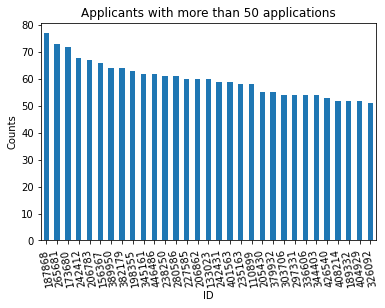

In [12]:
prevAppCounts[prevAppCounts >50].plot(kind='bar')
plt.xticks(rotation=100)
plt.xlabel('ID')
plt.ylabel('Counts')
plt.title('Applicants with more than 50 applications')
plt.show()

The above visual indicates that are applicants with more than 50 applications in the dataset.

### Histogram of Number of previous applications for an ID

In [18]:
sum(appsDF['SK_ID_CURR'].value_counts()==1)

60458

Text(0.5, 1.0, 'Histogram of Number of previous applications for an ID')

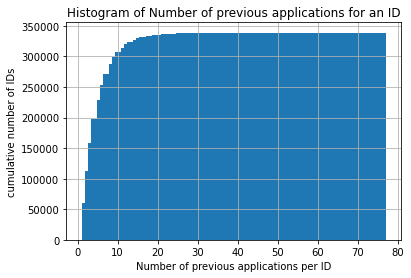

In [19]:
plt.hist(appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')


##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

In [20]:
apps_all = appsDF['SK_ID_CURR'].nunique()
apps_5plus = appsDF['SK_ID_CURR'].value_counts()>=5
apps_40plus = appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


### Multiple condition expressions in Pandas
So far, both our boolean selections have involved a single condition. You can, of course, have as many conditions as you would like. To do so, you will need to combine your boolean expressions using the three logical operators and, or and not.

Use &, | , ~
Although Python uses the syntax and, or, and not, these will not work when testing multiple conditions with pandas. The details of why are explained [here](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-39e811c81a0c).

You must use the following operators with pandas:

* & for and
* | for or
* ~ for not

In [74]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6     2315218      175704         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
6         0.0               NaN              NaN                    TUESDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
6                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
6                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
6                       NaN                    XNA             Canceled   

   DAYS_DECISION NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
6            -14               XNA                XAP             NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
6         Repeater                 XNA            XNA               XNA   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
6  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
6          NaN              XNA                Cash                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
6             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
6                        NaN

In [75]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704) & ~(appsDF["AMT_CREDIT"]==1.0)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6     2315218      175704         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
6         0.0               NaN              NaN                    TUESDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
6                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
6                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
6                       NaN                    XNA             Canceled   

   DAYS_DECISION NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
6            -14               XNA                XAP             NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
6         Repeater                 XNA            XNA               XNA   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
6  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
6          NaN              XNA                Cash                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
6             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
6                        NaN

## Missing values in prevApps

In [76]:
appsDF.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [77]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

## Feature engineering for prevApp table

Feature engineering for highly correlated numerical features using mean, min , max , sum & count aggregation functions.

In [9]:
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
agg_op_features = {}
cols = []
agg_func_list=["mean", "min", "max"]

for f in features: #build agg dictionary
    agg_op_features[f] = agg_func_list
    cols.append(f"{f}_{func}" for func in agg_func_list)

print(agg_op_features)
print(f"{appsDF[features].describe()}")
print()
# # results = appsDF.groupby('SK_ID_CURR').agg({'AMT_ANNUITY': ['mean', 'min', 'max'],'AMT_APPLICATION': ['mean', 'min', 'max'] })
# result = appsDF.groupby('SK_ID_CURR').agg({features[0]: ['mean', 'min', 'max'],features[1]: ['mean', 'min', 'max'] })
result = appsDF.groupby('SK_ID_CURR').agg(agg_op_features)

result.columns = ["_".join(x) for x in result.columns.ravel()]
result = result.reset_index(level=["SK_ID_CURR"])
result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
print(f"result.shape: {result.shape}")
result.head(10)


{'AMT_ANNUITY': ['mean', 'min', 'max'], 'AMT_APPLICATION': ['mean', 'min', 'max']}
        AMT_ANNUITY  AMT_APPLICATION
count  1.297979e+06     1.670214e+06
mean   1.595512e+04     1.752339e+05
std    1.478214e+04     2.927798e+05
min    0.000000e+00     0.000000e+00
25%    6.321780e+03     1.872000e+04
50%    1.125000e+04     7.104600e+04
75%    2.065842e+04     1.803600e+05
max    4.180581e+05     6.905160e+06

result.shape: (338857, 8)


SK_ID_CURR  AMT_ANNUITY_mean  AMT_ANNUITY_min  AMT_ANNUITY_max  \
0      100001       3951.000000         3951.000         3951.000   
1      100002       9251.775000         9251.775         9251.775   
2      100003      56553.990000         6737.310        98356.995   
3      100004       5357.250000         5357.250         5357.250   
4      100005       4813.200000         4813.200         4813.200   
5      100006      23651.175000         2482.920        39954.510   
6      100007      12278.805000         1834.290        22678.785   
7      100008      15839.696250         8019.090        25309.575   
8      100009      10051.412143         7435.845        17341.605   
9      100010      27463.410000        27463.410        27463.410   

   AMT_APPLICATION_mean  AMT_APPLICATION_min  AMT_APPLICATION_max  \
0          24835.500000              24835.5              24835.5   
1         179055.000000             179055.0             179055.0   
2         435436.500000              68809.5             900000.0   
3          24282.000000              24282.0              24282.0   
4          22308.750000                  0.0              44617.5   
5         272203.260000                  0.0             688500.0   
6         150530.250000              17176.5             247500.0   
7         155701.800000                  0.0             450000.0   
8          76741.714286              40455.0             110160.0   
9         247212.000000             247212.0             247212.0   

   range_AMT_APPLICATION  
0                    0.0  
1                    0.0  
2               831190.5  
3                    0.0  
4                44617.5  
5               688500.0  
6               230323.5  
7               450000.0  
8                69705.0  
9                    0.0

In [22]:
result.isna().sum()

SK_ID_CURR                 0
AMT_ANNUITY_mean         480
AMT_ANNUITY_min          480
AMT_ANNUITY_max          480
AMT_APPLICATION_mean       0
AMT_APPLICATION_min        0
AMT_APPLICATION_max        0
range_AMT_APPLICATION      0
dtype: int64

## Feature transformer for prevApp table

Testing Feature Transformer for selected field

In [10]:
# Create aggregate features (via pipeline)
class prevAppsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
#             self.agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
            self.agg_op_features[f] =  ["min", "max", "mean"]

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
#         result.columns = result.columns.droplevel()
        result.columns = ["_".join(x) for x in result.columns.ravel()]

        result = result.reset_index(level=["SK_ID_CURR"])
        result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
        return result # return dataframe with the join key "SK_ID_CURR"
    

from sklearn.pipeline import make_pipeline 
def test_driver_prevAppsFeaturesAggregater(df, features):
    print(f"df.shape: {df.shape}\n")
    print(f"df[{features}][0:5]: \n{df[features][0:5]}")
    test_pipeline = make_pipeline(prevAppsFeaturesAggregater(features))
    return(test_pipeline.fit_transform(df))
         
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
features = ['AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CNT_PAYMENT', 
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
res = test_driver_prevAppsFeaturesAggregater(appsDF, features)
print(f"HELLO")
print(f"Test driver: \n{res[0:10]}")
print(f"input[features][0:10]: \n{appsDF[0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


df.shape: (1670214, 37)

df[['AMT_ANNUITY', 'AMT_APPLICATION']][0:5]: 
   AMT_ANNUITY  AMT_APPLICATION
0     1730.430          17145.0
1    25188.615         607500.0
2    15060.735         112500.0
3    47041.335         450000.0
4    31924.395         337500.0
HELLO
Test driver: 
   SK_ID_CURR  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0      100001         3951.000         3951.000       3951.000000   
1      100002         9251.775         9251.775       9251.775000   
2      100003         6737.310        98356.995      56553.990000   
3      100004         5357.250         5357.250       5357.250000   
4      100005         4813.200         4813.200       4813.200000   
5      100006         2482.920        39954.510      23651.175000   
6      100007         1834.290        22678.785      12278.805000   
7      100008         8019.090        25309.575      15839.696250   
8      100009         7435.845        17341.605      10051.412143   
9      100010        27463.

## Feature Engineering for Primary & Secondary Tables

Choosing Highly correlated features from all input datasets

In [24]:
def correlation_files_target(df_name):
  A = datasets["application_train"].copy()
  B = datasets[df_name].copy()
  correlation_matrix =  pd.concat([A.TARGET, B], axis=1).corr().filter(B.columns).filter(A.columns, axis=0)
  return correlation_matrix

In [26]:
df_name = "previous_application"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the previous_application against the Target is :


AMT_DOWN_PAYMENT             0.002496
CNT_PAYMENT                  0.002341
DAYS_LAST_DUE_1ST_VERSION    0.001908
AMT_CREDIT                   0.001833
AMT_APPLICATION              0.001689
AMT_GOODS_PRICE              0.001676
SK_ID_CURR                   0.001107
NFLAG_INSURED_ON_APPROVAL    0.000879
RATE_DOWN_PAYMENT            0.000850
RATE_INTEREST_PRIMARY        0.000542
SK_ID_PREV                   0.000362
DAYS_DECISION               -0.000482
AMT_ANNUITY                 -0.000492
DAYS_FIRST_DUE              -0.000943
SELLERPLACE_AREA            -0.000954
DAYS_TERMINATION            -0.001072
NFLAG_LAST_APPL_IN_DAY      -0.001256
DAYS_FIRST_DRAWING          -0.001293
DAYS_LAST_DUE               -0.001940
HOUR_APPR_PROCESS_START     -0.002285
RATE_INTEREST_PRIVILEGED    -0.026427
Name: TARGET, dtype: float64

In [17]:
df_name = "bureau"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the bureau against the Target is :


DAYS_CREDIT_UPDATE        0.002159
DAYS_CREDIT_ENDDATE       0.002048
SK_ID_BUREAU              0.001550
DAYS_CREDIT               0.001443
AMT_CREDIT_SUM            0.000218
DAYS_ENDDATE_FACT         0.000203
AMT_ANNUITY               0.000189
AMT_CREDIT_MAX_OVERDUE   -0.000389
CNT_CREDIT_PROLONG       -0.000495
AMT_CREDIT_SUM_LIMIT     -0.000558
AMT_CREDIT_SUM_DEBT      -0.000946
SK_ID_CURR               -0.001070
AMT_CREDIT_SUM_OVERDUE   -0.001464
CREDIT_DAY_OVERDUE       -0.001815
Name: TARGET, dtype: float64

In [18]:
df_name = "bureau_balance"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the bureau_balance against the Target is :


SK_ID_BUREAU      0.001223
MONTHS_BALANCE   -0.005262
Name: TARGET, dtype: float64

In [19]:
df_name = "credit_card_balance"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the credit_card_balance against the Target is :


CNT_DRAWINGS_ATM_CURRENT      0.001908
AMT_DRAWINGS_ATM_CURRENT      0.001520
AMT_INST_MIN_REGULARITY       0.001435
SK_ID_CURR                    0.001086
AMT_CREDIT_LIMIT_ACTUAL       0.000515
AMT_BALANCE                   0.000448
SK_ID_PREV                    0.000446
AMT_RECIVABLE                 0.000412
AMT_TOTAL_RECEIVABLE          0.000407
AMT_RECEIVABLE_PRINCIPAL      0.000383
SK_DPD                        0.000092
SK_DPD_DEF                   -0.000201
CNT_INSTALMENT_MATURE_CUM    -0.000342
MONTHS_BALANCE               -0.000768
AMT_PAYMENT_CURRENT          -0.001129
AMT_PAYMENT_TOTAL_CURRENT    -0.001395
AMT_DRAWINGS_CURRENT         -0.001419
CNT_DRAWINGS_CURRENT         -0.001764
CNT_DRAWINGS_OTHER_CURRENT   -0.001833
CNT_DRAWINGS_POS_CURRENT     -0.002387
AMT_DRAWINGS_OTHER_CURRENT   -0.002672
AMT_DRAWINGS_POS_CURRENT     -0.003518
Name: TARGET, dtype: float64

In [ ]:
#df_name = "installments_payments"
#correlation_matrix = correlation_files_target(df_name)
#print(f"Correlation of the {df_name} against the Target is :")
#correlation_matrix.T.TARGET.sort_values(ascending= False)

In [ ]:
#df_name = "POS_CASH_balance"
#correlation_matrix = correlation_files_target(df_name)
#print(f"Correlation of the {df_name} against the Target is :")

#correlation_matrix.T.TARGET.sort_values(ascending= False)

In [11]:
agg_funcs = ['min', 'max', 'mean', 'count', 'sum']

prevApps = datasets['previous_application']
prevApps_features = ['AMT_ANNUITY', 'AMT_APPLICATION']

bureau = datasets['bureau']
bureau_features = ['AMT_ANNUITY', 'AMT_CREDIT_SUM']
# bureau_funcs = ['min', 'max', 'mean', 'count', 'sum']

bureau_bal = datasets['bureau_balance']
bureau_bal_features = ['MONTHS_BALANCE']

cc_bal = datasets['credit_card_balance']
cc_bal_features = ['MONTHS_BALANCE', 'AMT_BALANCE', 'CNT_INSTALMENT_MATURE_CUM']

installments_pmnts = datasets['installments_payments']
installments_pmnts_features = ['AMT_INSTALMENT', 'AMT_PAYMENT']

## Feature Aggregator
<a id='newfeature'></a> 

In [12]:
# Pipelines
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder


class FeaturesAggregator(BaseEstimator, TransformerMixin):
    def __init__(self, file_name=None, features=None, funcs=None): # no *args or **kargs
        self.file_name = file_name
        self.features = features
        self.funcs = funcs
        self.agg_op_features = {}
        for f in self.features:
            temp = {f"{file_name}_{f}_{func}":func for func in self.funcs}
            self.agg_op_features[f]=[(k, v) for k, v in temp.items()]
        print(self.agg_op_features)
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        return result # return dataframe with the join key "SK_ID_CURR"

In [13]:
class engineer_features(BaseEstimator, TransformerMixin):
    def __init__(self, features=None):
        self
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):

# FROM APPLICATION
        # ADD INCOME CREDIT PERCENTAGE
        X['ef_INCOME_CREDIT_PERCENT'] = (
            X.AMT_INCOME_TOTAL / X.AMT_CREDIT).replace(np.inf, 0)
    
        # ADD INCOME PER FAMILY MEMBER
        X['ef_FAM_MEMBER_INCOME'] = (
            X.AMT_INCOME_TOTAL / X.CNT_FAM_MEMBERS).replace(np.inf, 0)
    
        # ADD ANNUITY AS PERCENTAGE OF ANNUAL INCOME
        X['ef_ANN_INCOME_PERCENT'] = (
            X.AMT_ANNUITY / X.AMT_INCOME_TOTAL).replace(np.inf, 0)

# FROM MERGED PREVIOUS APPLICATION
        # ADD PREVIOUS APPLICATION RANGE
#        X['ef_prevApps_AMT_APPLICATION_RANGE'] = (
#            X.prevApps_AMT_ANNUITY_max - X.prevApps_AMT_ANNUITY_min).replace(np.inf, 0)

# FROM MERGED BUREAU
        # ADD BUREAU CREDIT RANGE
#        X['ef_bureau_AMT_CREDIT_RANGE'] = (
#            X.bureau_AMT_CREDIT_SUM_max - X.bureau_AMT_CREDIT_SUM_min).replace(np.inf, 0)        

        return X

In [14]:
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion

prevApps_feature_pipeline = Pipeline([
#        ('prevApps_add_features1', prevApps_add_features1()),  # add some new features 
#        ('prevApps_add_features2', prevApps_add_features2()),  # add some new features
    ('prevApps_aggregator', FeaturesAggregator('prevApps', prevApps_features, agg_funcs)), # Aggregate across old and new features
    ])

bureau_feature_pipeline = Pipeline([
#        ('bureau_add_features1', bureau_add_features1()),  # add some new features 
#        ('bureau_add_features2', bureau_add_features2()),  # add some new features
    ('bureau_aggregator', FeaturesAggregator('bureau', bureau_features, agg_funcs)), # Aggregate across old and new features
    ])

bureau_bal_features_pipeline = Pipeline([
#        ('bureau_add_features1', bureau_add_features1()),  # add some new features 
#        ('bureau_add_features2', bureau_add_features2()),  # add some new features
    ('bureau_bal_aggregator', FeaturesAggregator('bureau_balance', bureau_bal_features , agg_funcs)), # Aggregate across old and new features
    ])

cc_bal_features_pipeline = Pipeline([
#        ('bureau_add_features1', bureau_add_features1()),  # add some new features 
#        ('bureau_add_features2', bureau_add_features2()),  # add some new features
    ('cc_bal_aggregator', FeaturesAggregator('credit_card_balance', cc_bal_features , agg_funcs)), # Aggregate across old and new features
    ])

installments_pmnts_features_pipeline = Pipeline([
#        ('bureau_add_features1', bureau_add_features1()),  # add some new features 
#        ('bureau_add_features2', bureau_add_features2()),  # add some new features
    ('installments_pmnts_features_aggregator', FeaturesAggregator('credit_card_balance', installments_pmnts_features , agg_funcs)), # Aggregate across old and new features
    ])

# Feature engineering pipeline for application_train
appln_feature_pipeline = Pipeline([
    ('engineer_features', engineer_features()),  # add some new features
    ])

{'AMT_ANNUITY': [('prevApps_AMT_ANNUITY_min', 'min'), ('prevApps_AMT_ANNUITY_max', 'max'), ('prevApps_AMT_ANNUITY_mean', 'mean'), ('prevApps_AMT_ANNUITY_count', 'count'), ('prevApps_AMT_ANNUITY_sum', 'sum')], 'AMT_APPLICATION': [('prevApps_AMT_APPLICATION_min', 'min'), ('prevApps_AMT_APPLICATION_max', 'max'), ('prevApps_AMT_APPLICATION_mean', 'mean'), ('prevApps_AMT_APPLICATION_count', 'count'), ('prevApps_AMT_APPLICATION_sum', 'sum')]}
{'AMT_ANNUITY': [('bureau_AMT_ANNUITY_min', 'min'), ('bureau_AMT_ANNUITY_max', 'max'), ('bureau_AMT_ANNUITY_mean', 'mean'), ('bureau_AMT_ANNUITY_count', 'count'), ('bureau_AMT_ANNUITY_sum', 'sum')], 'AMT_CREDIT_SUM': [('bureau_AMT_CREDIT_SUM_min', 'min'), ('bureau_AMT_CREDIT_SUM_max', 'max'), ('bureau_AMT_CREDIT_SUM_mean', 'mean'), ('bureau_AMT_CREDIT_SUM_count', 'count'), ('bureau_AMT_CREDIT_SUM_sum', 'sum')]}
{'MONTHS_BALANCE': [('bureau_balance_MONTHS_BALANCE_min', 'min'), ('bureau_balance_MONTHS_BALANCE_max', 'max'), ('bureau_balance_MONTHS_BALANCE_

## Prepare Datasets

In [15]:
appsTrainDF = datasets['application_train']
prevAppsDF = datasets["previous_application"] #prev app
bureauDF = datasets["bureau"] #bureau app

bureaubalDF = datasets['bureau_balance']
ccbalDF = datasets["credit_card_balance"] #prev app
installmentspaymentsDF = datasets["installments_payments"] #bureau app

## Fit Feature Engineering Pipeline

In [16]:
appsTrainDF = appln_feature_pipeline.fit_transform(appsTrainDF)
prevApps_aggregated = prevApps_feature_pipeline.fit_transform(prevAppsDF)
bureau_aggregated = bureau_feature_pipeline.fit_transform(bureauDF)



In [17]:
# bureaubal_aggregated = bureau_bal_features_pipeline.fit_transform(bureaubalDF)
ccblance_aggregated = cc_bal_features_pipeline.fit_transform(ccbalDF)
installments_pmnts_aggregated = installments_pmnts_features_pipeline.fit_transform(installmentspaymentsDF)

In [18]:
installments_pmnts_aggregated.head()

SK_ID_CURR  credit_card_balance_AMT_INSTALMENT_min  \
0      100001                                3951.000   
1      100002                                9251.775   
2      100003                                6662.970   
3      100004                                5357.250   
4      100005                                4813.200   

   credit_card_balance_AMT_INSTALMENT_max  \
0                               17397.900   
1                               53093.745   
2                              560835.360   
3                               10573.965   
4                               17656.245   

   credit_card_balance_AMT_INSTALMENT_mean  \
0                              5885.132143   
1                             11559.247105   
2                             64754.586000   
3                              7096.155000   
4                              6240.205000   

   credit_card_balance_AMT_INSTALMENT_count  \
0                                         7   
1                                        19   
2                                        25   
3                                         3   
4                                         9   

   credit_card_balance_AMT_INSTALMENT_sum  \
0                               41195.925   
1                              219625.695   
2                             1618864.650   
3                               21288.465   
4                               56161.845   

   credit_card_balance_AMT_PAYMENT_min  credit_card_balance_AMT_PAYMENT_max  \
0                             3951.000                            17397.900   
1                             9251.775                            53093.745   
2                             6662.970                           560835.360   
3                             5357.250                            10573.965   
4                             4813.200                            17656.245   

   credit_card_balance_AMT_PAYMENT_mean  \
0                           5885.132143   
1                          11559.247105   
2                          64754.586000   
3                           7096.155000   
4                           6240.205000   

   credit_card_balance_AMT_PAYMENT_count  credit_card_balance_AMT_PAYMENT_sum  
0                                      7                            41195.925  
1                                     19                           219625.695  
2                                     25                          1618864.650  
3                                      3                            21288.465  
4                                      9                            56161.845

## Join the labeled dataset

In [19]:
datasets.keys()

dict_keys(['application_test', 'application_train', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

In [20]:

merge_all_data = True

if merge_all_data:
    prevApps_aggregated = prevApps_feature_pipeline.transform(appsDF)

# merge primary table and secondary tables using features based on meta data and  aggregage stats 
if merge_all_data:
  appsTrainDF = appsTrainDF.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')
  appsTrainDF = appsTrainDF.merge(bureau_aggregated, how='left', on="SK_ID_CURR")
  appsTrainDF = appsTrainDF.merge(ccblance_aggregated, how='left', on="SK_ID_CURR")
  appsTrainDF = appsTrainDF.merge(installments_pmnts_aggregated, how='left', on="SK_ID_CURR")

In [21]:
# Features have been increased from 122 to 170.

print(appsTrainDF.shape)
appsTrainDF.head(3)

(307511, 170)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   ...  credit_card_balance_AMT_INSTALMENT_min  \
0  ...                                9251.775   
1  ...                                6662.970   
2  ...                                5357.250   

  credit_card_balance_AMT_INSTALMENT_max  \
0                              53093.745   
1                             560835.360   
2                              10573.965   

  credit_card_balance_AMT_INSTALMENT_mean  \
0                            11559.247105   
1                            64754.586000   
2                             7096.155000   

  credit_card_balance_AMT_INSTALMENT_count  \
0                                     19.0   
1                                     25.0   
2                                      3.0   

  credit_card_balance_AMT_INSTALMENT_sum credit_card_balance_AMT_PAYMENT_min  \
0                             219625.695                            9251.775   
1                            1618864.650                            6662.970   
2                              21288.465                            5357.250   

   credit_card_balance_AMT_PAYMENT_max  credit_card_balance_AMT_PAYMENT_mean  \
0                            53093.745                          11559.247105   
1                           560835.360                          64754.586000   
2                            10573.965                           7096.155000   

   credit_card_balance_AMT_PAYMENT_count  credit_card_balance_AMT_PAYMENT_sum  
0                                   19.0                           219625.695  
1                                   25.0                          1618864.650  
2                                    3.0                            21288.465  

[3 rows x 170 columns]

## Join the unlabeled dataset (i.e., the submission file)

In [22]:
X_kaggle_test= datasets["application_test"]
X_kaggle_test = appln_feature_pipeline.fit_transform(X_kaggle_test)

merge_all_data = True
if merge_all_data:
    X_kaggle_test = X_kaggle_test.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')
    X_kaggle_test = X_kaggle_test.merge(bureau_aggregated, how='left', on="SK_ID_CURR")
    X_kaggle_test = X_kaggle_test.merge(ccblance_aggregated, how='left', on="SK_ID_CURR")
    X_kaggle_test = X_kaggle_test.merge(installments_pmnts_aggregated, how='left', on="SK_ID_CURR")
    

In [23]:
print(X_kaggle_test.shape)

X_kaggle_test.head(3)

(48744, 169)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   

   ... credit_card_balance_AMT_INSTALMENT_min  \
0  ...                                 3951.0   
1  ...                                 4813.2   
2  ...                                   67.5   

  credit_card_balance_AMT_INSTALMENT_max  \
0                              17397.900   
1                              17656.245   
2                             357347.745   

  credit_card_balance_AMT_INSTALMENT_mean  \
0                             5885.132143   
1                             6240.205000   
2                            10897.898516   

  credit_card_balance_AMT_INSTALMENT_count  \
0                                      7.0   
1                                      9.0   
2                                    155.0   

  credit_card_balance_AMT_INSTALMENT_sum  credit_card_balance_AMT_PAYMENT_min  \
0                              41195.925                             3951.000   
1                              56161.845                             4813.200   
2                            1689174.270                                6.165   

   credit_card_balance_AMT_PAYMENT_max  credit_card_balance_AMT_PAYMENT_mean  \
0                            17397.900                           5885.132143   
1                            17656.245                           6240.205000   
2                           357347.745                           9740.235774   

   credit_card_balance_AMT_PAYMENT_count  credit_card_balance_AMT_PAYMENT_sum  
0                                    7.0                            41195.925  
1                                    9.0                            56161.845  
2                                  155.0                          1509736.545  

[3 rows x 169 columns]

In [24]:
print(appsTrainDF.shape)

(307511, 170)


In [26]:
appsTrainDF.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  credit_card_balance_AMT_INSTALMENT_min  \
0  ...                                9251.775   
1  ...                                6662.970   
2  ...                                5357.250   
3  ...                                2482.920   
4  ...                                1821.780   

  credit_card_balance_AMT_INSTALMENT_max  \
0                              53093.745   
1                             560835.360   
2                              10573.965   
3                             691786.890   
4                              22678.785   

  credit_card_balance_AMT_INSTALMENT_mean  \
0                            11559.247105   
1                            64754.586000   
2                             7096.155000   
3                            62947.088438   
4                            12666.444545   

  credit_card_balance_AMT_INSTALMENT_count  \
0                                     19.0   
1                                     25.0   
2                                      3.0   
3                                     16.0   
4                                     66.0   

  credit_card_balance_AMT_INSTALMENT_sum credit_card_balance_AMT_PAYMENT_min  \
0                             219625.695                            9251.775   
1                            1618864.650                            6662.970   
2                              21288.465                            5357.250   
3                            1007153.415                            2482.920   
4                             835985.340                               0.180   

   credit_card_balance_AMT_PAYMENT_max  credit_card_balance_AMT_PAYMENT_mean  \
0                            53093.745                          11559.247105   
1                           560835.360                          64754.586000   
2                            10573.965                           7096.155000   
3                           691786.890                          62947.088438   
4                            22678.785                          12214.060227   

   credit_card_balance_AMT_PAYMENT_count  credit_card_balance_AMT_PAYMENT_sum  
0                                   19.0                           219625.695  
1                                   25.0                          1618864.650  
2                                    3.0                            21288.465  
3                                   16.0                          1007153.415  
4                                   66.0                           806127.975  

[5 rows x 170 columns]

In [27]:
appsTrainDF[['ef_INCOME_CREDIT_PERCENT', 'ef_FAM_MEMBER_INCOME', 'ef_ANN_INCOME_PERCENT']]

ef_INCOME_CREDIT_PERCENT  ef_FAM_MEMBER_INCOME  ef_ANN_INCOME_PERCENT
0                       0.498036              202500.0               0.121978
1                       0.208736              135000.0               0.132217
2                       0.500000               67500.0               0.100000
3                       0.431748               67500.0               0.219900
4                       0.236842              121500.0               0.179963
...                          ...                   ...                    ...
307506                  0.618375              157500.0               0.174971
307507                  0.267112               72000.0               0.166687
307508                  0.225776              153000.0               0.195941
307509                  0.462029               85500.0               0.118158
307510                  0.233333               78750.0               0.311857

[307511 rows x 3 columns]

**Deductions from the list of dtypes of the appsTrainDF**

* There 154 numerical features.
* There are 16 categorical features.
* The categorical features dont show up in the final correlation matrix of the appsTrainDF.

In [37]:
appsTrainDF.dtypes.value_counts()

float64    113
int64       41
object      16
dtype: int64

In [38]:
start = time()
correlation_with_all_features = appsTrainDF.corr()
end = time()

In [39]:
print("Time taken for correlation ", ctime(end - start))
print()
correlation_with_all_features['TARGET'].sort_values()

Time taken for correlation  Thu Jan  1 00:01:12 1970



EXT_SOURCE_3                               -0.178919
EXT_SOURCE_2                               -0.160472
EXT_SOURCE_1                               -0.155317
credit_card_balance_MONTHS_BALANCE_count   -0.060481
credit_card_balance_AMT_BALANCE_count      -0.060481
                                              ...   
credit_card_balance_AMT_BALANCE_min         0.064163
credit_card_balance_AMT_BALANCE_max         0.068798
DAYS_BIRTH                                  0.078239
credit_card_balance_AMT_BALANCE_mean        0.087177
TARGET                                      1.000000
Name: TARGET, Length: 154, dtype: float64

In [40]:
# correlation_with_all_features.reset_index(inplace= True)
len(correlation_with_all_features.index)

154

In [52]:
# set this value to choose the number of positive and negative correlated features
n_val = 15


print("---"*15)
print("---"*15)

print("    Total correlation of all the features.    " )

print("---"*15)
print("---"*15)

print(f"Top {n_val} negative correlated features")
print()
print(correlation_with_all_features.TARGET.sort_values(ascending = True).head(n_val))
print()
print()
print(f"Top {n_val} positive correlated features")
print()
print(correlation_with_all_features.TARGET.sort_values(ascending = True).tail(n_val))

---------------------------------------------
---------------------------------------------
    Total correlation of all the features.    
---------------------------------------------
---------------------------------------------
Top 15 negative correlated features

EXT_SOURCE_3                                          -0.178919
EXT_SOURCE_2                                          -0.160472
EXT_SOURCE_1                                          -0.155317
credit_card_balance_MONTHS_BALANCE_count              -0.060481
credit_card_balance_AMT_BALANCE_count                 -0.060481
credit_card_balance_CNT_INSTALMENT_MATURE_CUM_count   -0.055621
DAYS_EMPLOYED                                         -0.044932
FLOORSMAX_AVG                                         -0.044003
FLOORSMAX_MEDI                                        -0.043768
FLOORSMAX_MODE                                        -0.043226
credit_card_balance_CNT_INSTALMENT_MATURE_CUM_sum     -0.042363
AMT_GOODS_PRICE             

In [53]:
correlation_with_all_features.TARGET.sort_values(ascending = True)[-n_val:]


REG_CITY_NOT_LIVE_CITY                     0.044395
FLAG_EMP_PHONE                             0.045982
REG_CITY_NOT_WORK_CITY                     0.050994
DAYS_ID_PUBLISH                            0.051457
DAYS_LAST_PHONE_CHANGE                     0.055218
REGION_RATING_CLIENT                       0.058899
credit_card_balance_MONTHS_BALANCE_sum     0.059051
REGION_RATING_CLIENT_W_CITY                0.060893
credit_card_balance_MONTHS_BALANCE_min     0.061359
credit_card_balance_MONTHS_BALANCE_mean    0.062081
credit_card_balance_AMT_BALANCE_min        0.064163
credit_card_balance_AMT_BALANCE_max        0.068798
DAYS_BIRTH                                 0.078239
credit_card_balance_AMT_BALANCE_mean       0.087177
TARGET                                     1.000000
Name: TARGET, dtype: float64

In [54]:
tf_apps_train_final = []

featureslist1 = correlation_with_all_features.TARGET.sort_values(ascending = True)[:n_val].index.tolist()
featureslist2 = correlation_with_all_features.TARGET.sort_values(ascending = True)[-n_val:].index.tolist()
tf_apps_train_final = featureslist1 + featureslist2


In [55]:
tf_apps_train_final.remove('TARGET')
print(len(tf_apps_train_final))
display((tf_apps_train_final))

29


['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'credit_card_balance_MONTHS_BALANCE_count',
 'credit_card_balance_AMT_BALANCE_count',
 'credit_card_balance_CNT_INSTALMENT_MATURE_CUM_count',
 'DAYS_EMPLOYED',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'credit_card_balance_CNT_INSTALMENT_MATURE_CUM_sum',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'prevApps_AMT_ANNUITY_mean',
 'ELEVATORS_AVG',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_EMP_PHONE',
 'REG_CITY_NOT_WORK_CITY',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'REGION_RATING_CLIENT',
 'credit_card_balance_MONTHS_BALANCE_sum',
 'REGION_RATING_CLIENT_W_CITY',
 'credit_card_balance_MONTHS_BALANCE_min',
 'credit_card_balance_MONTHS_BALANCE_mean',
 'credit_card_balance_AMT_BALANCE_min',
 'credit_card_balance_AMT_BALANCE_max',
 'DAYS_BIRTH',
 'credit_card_balance_AMT_BALANCE_mean']

In [56]:
appsTrainDF.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [57]:
for idx in tf_apps_train_final:
  print(f"{idx:50}  {appsTrainDF[idx].dtypes}")

EXT_SOURCE_3                                        float64
EXT_SOURCE_2                                        float64
EXT_SOURCE_1                                        float64
credit_card_balance_MONTHS_BALANCE_count            float64
credit_card_balance_AMT_BALANCE_count               float64
credit_card_balance_CNT_INSTALMENT_MATURE_CUM_count  float64
DAYS_EMPLOYED                                       int64
FLOORSMAX_AVG                                       float64
FLOORSMAX_MEDI                                      float64
FLOORSMAX_MODE                                      float64
credit_card_balance_CNT_INSTALMENT_MATURE_CUM_sum   float64
AMT_GOODS_PRICE                                     float64
REGION_POPULATION_RELATIVE                          float64
prevApps_AMT_ANNUITY_mean                           float64
ELEVATORS_AVG                                       float64
REG_CITY_NOT_LIVE_CITY                              int64
FLAG_EMP_PHONE                             

In [58]:
modeling_num_attrib = []
modeling_cat_attrib = []

for idx in tf_apps_train_final:
  if appsTrainDF[idx].dtypes in ['int64', 'float64']:
    modeling_num_attrib.append(idx)
  else:
    modeling_cat_attrib.append(idx)

print(len(modeling_num_attrib))
print(len(modeling_cat_attrib))

29
0


In [28]:
# Convert categorical features to numerical approximations (via pipeline)
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
        los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
        X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else int(162))
        X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X
    
    


In [29]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

# Creates the following date features
# But could do so much more with these features
#    E.g., 
#      extract the domain address of the homepage and OneHotEncode it
# 
# ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
    def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)   
        #df.drop(self.features, axis=1, inplace=True)
        return np.array(df.values)  #return a Numpy Array to observe the pipeline protocol
    

from sklearn.pipeline import make_pipeline 
features = ["OCCUPATION_TYPE"]
def test_driver_prep_OCCUPATION_TYPE():
    print(f"X_train.shape: {X_train.shape}\n")
    print(f"X_train['name'][0:5]: \n{X_train[features][0:5]}")
    test_pipeline = make_pipeline(prep_OCCUPATION_TYPE(features))
    return(test_pipeline.fit_transform(X_train))
          
#x = test_driver_prep_OCCUPATION_TYPE()
#print(f"Test driver: \n{test_driver_prep_OCCUPATION_TYPE()[0:10, :]}")
#print(f"X_train['name'][0:10]: \n{X_train[features][0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


# Processing pipeline

In [30]:
#train_dataset = datasets["application_train"]
train_dataset=appsTrainDF
class_labels = ["No Default","Default"]

## HCDR preprocessing

### Column Selector

In [31]:
# Create a class to select numerical or categorical columns since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

### Numerical Attributes

In [63]:
# Identify the numeric features we wish to consider. 
#num_attribs = [
#    'AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
#    'EXT_SOURCE_2','EXT_SOURCE_3']

In [32]:
num_attribs = [
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'EXT_SOURCE_3',
'EXT_SOURCE_2',
'EXT_SOURCE_1',
'DAYS_EMPLOYED',
'DAYS_BIRTH',
'FLOORSMAX_AVG',
'FLOORSMAX_MEDI',
'FLOORSMAX_MODE',
'AMT_GOODS_PRICE',
'REGION_POPULATION_RELATIVE',
'ELEVATORS_AVG',
'REG_CITY_NOT_LIVE_CITY',
'FLAG_EMP_PHONE',
'REG_CITY_NOT_WORK_CITY',
'DAYS_ID_PUBLISH',
'DAYS_LAST_PHONE_CHANGE',
'REGION_RATING_CLIENT',
'REGION_RATING_CLIENT_W_CITY',
## Highly correlated previous applications
'prevApps_AMT_ANNUITY_mean',
## Highly correlated Credit card balance features
'credit_card_balance_MONTHS_BALANCE_count',
'credit_card_balance_AMT_BALANCE_count',
'credit_card_balance_CNT_INSTALMENT_MATURE_CUM_count',
'credit_card_balance_CNT_INSTALMENT_MATURE_CUM_sum',
'credit_card_balance_MONTHS_BALANCE_sum',
'credit_card_balance_MONTHS_BALANCE_min',
'credit_card_balance_MONTHS_BALANCE_mean',
'credit_card_balance_AMT_BALANCE_min',
'credit_card_balance_AMT_BALANCE_max',
'credit_card_balance_AMT_BALANCE_mean'
]

### Numerical Pipeline definition

In [33]:
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

### Categorical Attributes

#####  OHE when previously unseen unique values in the test/validation set

Train, validation and Test sets (and the leakage problem we have mentioned previously):

 

Let's look at a small usecase to tell us how to deal with this:

* The OneHotEncoder is fitted to the training set, which means that for each unique value present in the training set, for each feature, a new column is created. Let's say we have 39 columns after the encoding up from 30 (before preprocessing).
* The output is a numpy array (when the option sparse=False is used), which has the disadvantage of losing all the information about the original column names and values.
* When we try to transform the test set, after having fitted the encoder to the training set, we obtain a `ValueError`. This is because the there are new, previously unseen unique values in the test set and the encoder doesn’t know how to handle these values. In order to use both the transformed training and test sets in machine learning algorithms, we need them to have the same number of columns.

This last problem can be solved by using the option handle_unknown='ignore'of the OneHotEncoder, which, as the name suggests, will ignore previously unseen values when transforming the test set.

 

Here is a example that in action:

```python
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

```


In [34]:
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

### Categorical Pipeline definition

In [35]:
# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

### Create Data Preparation Pipeline
With Feature union, combine numerical and categorical Pipeline together to prepare for Data pipeline

In [36]:
data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])              

### Selected Features

In [95]:
# appending the features found from the correlation matrix to manually selected features.

#for item in modeling_num_attrib:
#    if item not in num_attribs:
#        num_attribs.append(item)
#
#for item in modeling_cat_attrib:
#    if item not in cat_attribs:
#        cat_attribs.append(item)

#num_attribs.append(modeling_num_attrib)
#cat_attribs.append(modeling_cat_attrib)

#num_attribs = list(dict.fromkeys(num_attribs))
#cat_attribs = list(dict.fromkeys(cat_attribs))

In [37]:
selected_features = num_attribs + cat_attribs
tot_features = f"{len(selected_features)}:   Num:{len(num_attribs)},    Cat:{len(cat_attribs)}"
#Total Feature selected for processing
tot_features

'38:   Num:31,    Cat:7'

# Evaluation metrics

Since HCDR is a Classification task, we are going to use the following metrics to measure the Model performance 

## Accuracy Score
This metric describes the fraction of correctly classified samples. In SKLearn, it can be modified to return solely the number of correct samples.Accuracy is the default scoring method for both logistic regression and k-Nearest Neighbors in scikit-learn.
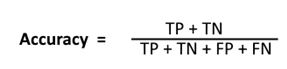

## Precision
The precision is the ratio of true positives over the total number of predicted positives.
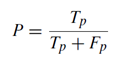

## Recall
The recall is the ratio of true positives over the true positives and false negatives. Recall is assessing the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0
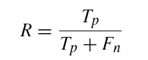

## F1 score
The F1 score is a metric that has a value of 0 - 1, with 1 being the best value. The F1 score is a weighted average of the precision and recall, with the contributions of precision and recall are the same
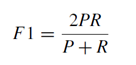

## Confusion Matrix
The confusion matrix, in this case for a binary classification, is a 2x2 matrix that contains the count of the true positives, false positives, true negatives, and false negatives.  
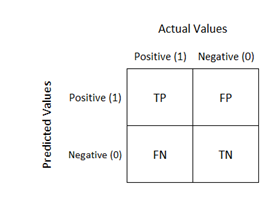

## AUC (Area under ROC curve)
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
▪	True Positive Rate
▪	False Positive Rate
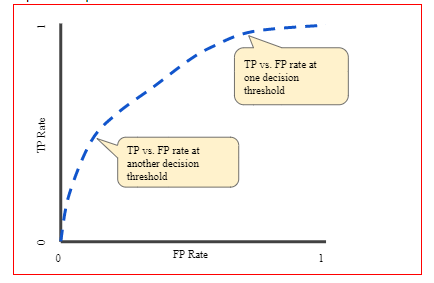

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).
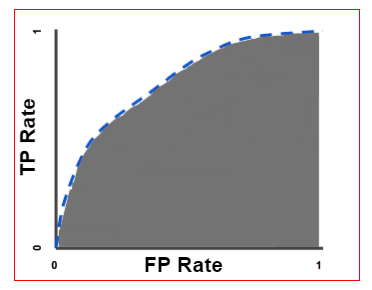

AUC is desirable for the following two reasons:
1. AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
2. AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.

## Binary cross-entropy loss (CXE)
CXE measures the performance of a classification model whose output is a probability value between 0 and 1. CXE increases as the predicted probability diverges from the actual label. Therefore, we choose a parameter, which would minimize the binary CXE loss function.

The log loss formula for the binary case is as follows : 

$$
-\frac{1}{m}\sum^m_{i=1}\left(y_i\cdot\:\log\:\left(p_i\right)\:+\:\left(1-y_i\right)\cdot\log\left(1-p_i\right)\right)
$$
- $y_i$: the label for $i_{th}$ observation
- $m$: sample size
- $p_i$: predicted probability of the point being in the label($y=1$) for $i_{th}$ observation


## p-value
p-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct. A very small p-value means that such an extreme observed outcome would be very unlikely under the null hypothesis.

We will compare the classifiers with the baseline untuned model by conducting two-tailed hypothesis test.

Null Hypothesis, H0: There is no significant difference between the two machine learning pipelines.
Alternate Hypothesis, HA: The two machine learning pipelines are different.
A p-value less than or equal to the significance level is considered statistically significant.

In [38]:
def confusion_matrix_def(model,X_train,y_train,X_test,y_test):
  #Prediction
  preds_test = model.predict(X_test)
  preds_train = model.predict(X_train)
  cm_train = confusion_matrix(y_train, preds_train).astype(np.float32)
  #print(cm_train)
  cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

  cm_test = confusion_matrix(y_test, preds_test).astype(np.float32)
  #print(cm_test)
  cm_test /= cm_test.sum(axis=1)[:, np.newaxis]

  plt.figure(figsize=(20, 8))

  plt.subplot(121)
  g = sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Reds")
  plt.xlabel("Predicted", fontsize=14)
  plt.ylabel("True", fontsize=14)
  g.set(xticklabels=class_labels, yticklabels=class_labels)
  plt.title("Train", fontsize=14)

  plt.subplot(122)
  g = sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="Reds")
  plt.xlabel("Predicted", fontsize=14)
  plt.ylabel("True", fontsize=14)
  g.set(xticklabels=class_labels, yticklabels=class_labels)
  plt.title("Test", fontsize=14);

# Baseline model with Imbalanced Dataset
## Create Train and Test Datasets

In [39]:
# Split Sample to feed the pipeline and it will result in a new dataset that is (1 / splits) the size 
splits = 3

# Train Test split percentage
subsample_rate = 0.3

finaldf = np.array_split(train_dataset, splits)
X_train = finaldf[0][selected_features]
y_train = finaldf[0]['TARGET']
X_kaggle_test= X_kaggle_test[selected_features]

## split part of data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train,
                                                    test_size=subsample_rate, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,stratify=y_train,test_size=0.15, random_state=42)

print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (60989, 38)
X validation      shape: (10763, 38)
X test            shape: (30752, 38)
X X_kaggle_test   shape: (48744, 38)


Convert the percentage to %

In [40]:
def pct(x):
    return round(100*x,3)

Define dataframe with all metrics included 

In [ ]:
#del expLog

In [41]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC",
                                   "Train F1 Score",
                                   "Test F1 Score",                                   
                                   "Train Log Loss",
                                   "Test Log Loss",
                                   "P Score",
                                   "Train Time",
                                   "Test Time",
                                   "Description"
                                  ])

## Define pipeline

In [42]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])

CPU times: user 208 ms, sys: 66.5 ms, total: 274 ms
Wall time: 273 ms


## Perform cross-fold validation and Train the model
Split the training data to 15 fold to perform Crossfold validation

In [43]:
cvSplits = ShuffleSplit(n_splits=15, test_size=0.3, random_state=0)

In [44]:
X_train.head(5)

AMT_INCOME_TOTAL  AMT_CREDIT  EXT_SOURCE_3  EXT_SOURCE_2  EXT_SOURCE_1  \
40832          117000.0    157500.0      0.729567      0.262060           NaN   
36820          166500.0    900000.0      0.743559      0.451283      0.600909   
81804           90000.0    495000.0           NaN      0.480293           NaN   
35092          112500.0    508495.5      0.722393      0.260275           NaN   
57197          135000.0    400500.0      0.304672      0.526361      0.275414   

       DAYS_EMPLOYED  DAYS_BIRTH  FLOORSMAX_AVG  FLOORSMAX_MEDI  \
40832           -439      -16633            NaN             NaN   
36820         365243      -22564            NaN             NaN   
81804           -434      -15989            NaN             NaN   
35092         365243      -22918            NaN             NaN   
57197           -641      -12513            NaN             NaN   

       FLOORSMAX_MODE  ...  credit_card_balance_AMT_BALANCE_min  \
40832             NaN  ...                                  NaN   
36820             NaN  ...                                  0.0   
81804             NaN  ...                                  0.0   
35092             NaN  ...                                  NaN   
57197             NaN  ...                                  0.0   

       credit_card_balance_AMT_BALANCE_max  \
40832                                  NaN   
36820                            194627.34   
81804                                 0.00   
35092                                  NaN   
57197                             64450.80   

       credit_card_balance_AMT_BALANCE_mean  CODE_GENDER  FLAG_OWN_REALTY  \
40832                                   NaN            F                Y   
36820                          40994.615602            F                Y   
81804                              0.000000            M                N   
35092                                   NaN            F                Y   
57197                           3229.703053            M                Y   

       FLAG_OWN_CAR  NAME_CONTRACT_TYPE            NAME_EDUCATION_TYPE  \
40832             N          Cash loans  Secondary / secondary special   
36820             Y          Cash loans  Secondary / secondary special   
81804             N          Cash loans  Secondary / secondary special   
35092             Y          Cash loans                Lower secondary   
57197             N          Cash loans  Secondary / secondary special   

       OCCUPATION_TYPE  NAME_INCOME_TYPE  
40832      Sales staff           Working  
36820              NaN         Pensioner  
81804         Laborers           Working  
35092              NaN         Pensioner  
57197       Core staff           Working  

[5 rows x 38 columns]

In [45]:
start = time()
model = full_pipeline_with_predictor.fit(X_train, y_train)
np.random.seed(42)

# Set up cross validation scores 
logit_scores = cross_val_score(full_pipeline_with_predictor,X_train , y_train,cv=cvSplits)               
logit_score_train = pct(logit_scores.mean())
train_time = np.round(time() - start, 4)

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time() - start, 4)

## Calculate metrics

In [46]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [logit_score_train, 
                pct(accuracy_score(y_valid, model.predict(X_valid))),
                pct(accuracy_score(y_test, model.predict(X_test))),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train)),
                f1_score(y_test, model.predict(X_test)),
                log_loss(y_train, model.predict(X_train)),
                log_loss(y_test, model.predict(X_test)),0 ],4)) \
                + [train_time,test_time] + [f"Imbalanced Logistic reg features {tot_features} with 20% training data"]
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_38_features     91.894     91.907     91.848     0.7453   

   Valid AUC  Test  AUC  Train F1 Score  Test F1 Score  Train Log Loss  \
0     0.7364     0.7369          0.0233         0.0203          2.8055   

   Test Log Loss  P Score  Train Time  Test Time  \
0         2.8157      0.0    162.8113     0.2187   

                                         Description  
0  Imbalanced Logistic reg features 38:   Num:31,...

## Confusion matrix

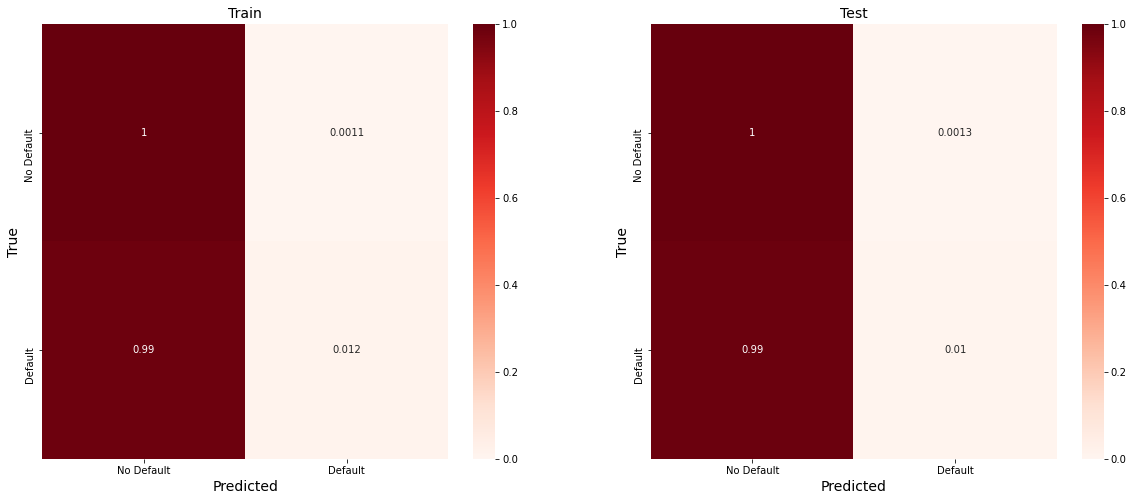

In [47]:
# Create confusion matrix for baseline model
confusion_matrix_def(model,X_train,y_train,X_test,y_test)

# Baseline Model - With sampled data

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model. Since 'No default and Default' target records are not balanced in trainging set, we are going to resample the minority class("Default with target value 1") to balance the input dataset

## Create Train and Test Datasets

In [ ]:
# Train Test split percentage
#subsample_rate = 0.3

#finaldf = train_dataset
#X_train = finaldf[0][selected_features]
#y_train = finaldf[0]['TARGET']

#X_train = finaldf[selected_features]
#y_train = finaldf['TARGET']
#X_kaggle_test= datasets["application_test"][selected_features]

## split part of data
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train,
#                                                    test_size=subsample_rate, random_state=42)


In [48]:
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,stratify=y_train,test_size=0.15, random_state=42)

print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (60989, 38)
X validation      shape: (10763, 38)
X test            shape: (30752, 38)
X X_kaggle_test   shape: (48744, 38)


In [49]:
# Bincount shows the imbalanced data in Target default and no default class
np.bincount(y_train)

array([56038,  4951])

## Resample Minority class
Resampling should be performed only in the train dataset, to avoid overfitting and data leakage.

In [50]:
# concatenate our training data back together
train_data = pd.concat([X_train, y_train], axis=1)
train_data.head()

AMT_INCOME_TOTAL  AMT_CREDIT  EXT_SOURCE_3  EXT_SOURCE_2  EXT_SOURCE_1  \
40832          117000.0    157500.0      0.729567      0.262060           NaN   
36820          166500.0    900000.0      0.743559      0.451283      0.600909   
81804           90000.0    495000.0           NaN      0.480293           NaN   
35092          112500.0    508495.5      0.722393      0.260275           NaN   
57197          135000.0    400500.0      0.304672      0.526361      0.275414   

       DAYS_EMPLOYED  DAYS_BIRTH  FLOORSMAX_AVG  FLOORSMAX_MEDI  \
40832           -439      -16633            NaN             NaN   
36820         365243      -22564            NaN             NaN   
81804           -434      -15989            NaN             NaN   
35092         365243      -22918            NaN             NaN   
57197           -641      -12513            NaN             NaN   

       FLOORSMAX_MODE  ...  credit_card_balance_AMT_BALANCE_max  \
40832             NaN  ...                                  NaN   
36820             NaN  ...                            194627.34   
81804             NaN  ...                                 0.00   
35092             NaN  ...                                  NaN   
57197             NaN  ...                             64450.80   

       credit_card_balance_AMT_BALANCE_mean  CODE_GENDER  FLAG_OWN_REALTY  \
40832                                   NaN            F                Y   
36820                          40994.615602            F                Y   
81804                              0.000000            M                N   
35092                                   NaN            F                Y   
57197                           3229.703053            M                Y   

       FLAG_OWN_CAR  NAME_CONTRACT_TYPE            NAME_EDUCATION_TYPE  \
40832             N          Cash loans  Secondary / secondary special   
36820             Y          Cash loans  Secondary / secondary special   
81804             N          Cash loans  Secondary / secondary special   
35092             Y          Cash loans                Lower secondary   
57197             N          Cash loans  Secondary / secondary special   

       OCCUPATION_TYPE  NAME_INCOME_TYPE  TARGET  
40832      Sales staff           Working       0  
36820              NaN         Pensioner       0  
81804         Laborers           Working       0  
35092              NaN         Pensioner       0  
57197       Core staff           Working       0  

[5 rows x 39 columns]

**After resampling, both default and non-default classes are balanced**

In [52]:
# separate minority and majority classes
no_default_data = train_data[train_data.TARGET==0]
default_data = train_data[train_data.TARGET==1]

# sample minority
default_sampled_data = resample(default_data,
                          replace=True, # sample with replacement
                          n_samples=len(no_default_data), # match number in majority class
                          random_state=42) # reproducible 

# combine majority and upsampled minority
train_data = pd.concat([no_default_data, default_sampled_data])

train_data.TARGET.value_counts()

1    56038
0    56038
Name: TARGET, dtype: int64

In [53]:
y_train = train_data['TARGET']
X_train = train_data[selected_features]

## Create a Pipeline with Baseline Model

In [54]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])

CPU times: user 202 µs, sys: 181 µs, total: 383 µs
Wall time: 397 µs


## Create crossfold validation splits
Split the training data to 15 fold to perform Crossfold validation

In [55]:
cvSplits = ShuffleSplit(n_splits=15, test_size=0.3, random_state=0)

## Baseline Prediction

In [56]:
start = time()
model = full_pipeline_with_predictor.fit(X_train, y_train)
np.random.seed(42)

# Set up cross validation scores 
logit_scores = cross_val_score(full_pipeline_with_predictor,X_train , y_train,cv=cvSplits)               
logit_score_train = pct(logit_scores.mean())
train_time = np.round(time() - start, 4)

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time() - start, 4)

## Baseline metrics

Accuracy, AUC score, F1 Score and Log loss used for measuring the baseline model 

In [57]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [logit_score_train, 
                pct(accuracy_score(y_valid, model.predict(X_valid))),
                pct(accuracy_score(y_test, model.predict(X_test))),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train)),
                f1_score(y_test, model.predict(X_test)),
                log_loss(y_train, model.predict(X_train)),
                log_loss(y_test, model.predict(X_test)),0 ],4)) \
                + [train_time,test_time] + [f"Untuned Balanced Logistic reg features {tot_features} with 30% training data"]
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_38_features     91.894     91.907     91.848     0.7453   
1  Baseline_38_features     68.453     67.658     68.685     0.7485   

   Valid AUC  Test  AUC  Train F1 Score  Test F1 Score  Train Log Loss  \
0     0.7364     0.7369          0.0233         0.0203          2.8055   
1     0.7380     0.7369          0.6840         0.2543         10.8876   

   Test Log Loss  P Score  Train Time  Test Time  \
0         2.8157      0.0    162.8113     0.2187   
1        10.8161      0.0    555.3523     0.2382   

                                         Description  
0  Imbalanced Logistic reg features 38:   Num:31,...  
1  Untuned Balanced Logistic reg features 38:   N...

## Confusion matrix

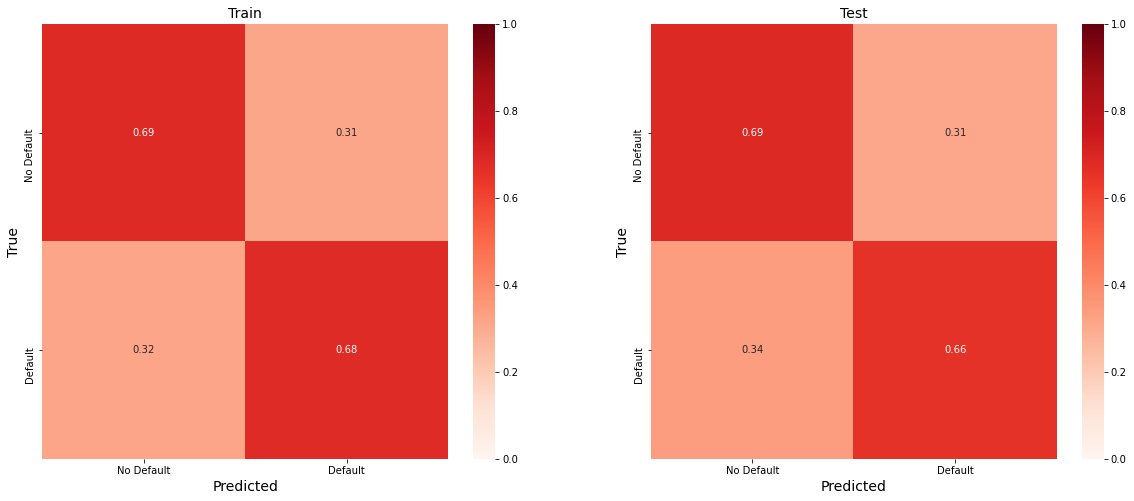

In [58]:
# Create confusion matrix for baseline model
confusion_matrix_def(model,X_train,y_train,X_test,y_test)

# Tune Basline model with grid search

Various Classification algorithms were used to compare with the best model. Following metrics were used to find the best model

* Cross fold Train Accuracy
* Test Accuracy
* p-value
* Train ROC_AUC_Score
* Test ROC_AUC_Score
* Train F1_Score
* Test F1_Score
* Train LogLoss
* Test LogLoss
* Train Time
* Test Time
* Confusion matrix

## Classifiers

In [59]:
classifiers = [
        ('Logistic Regression', LogisticRegression(solver='saga',random_state=42))]
#      ,
#        ('K-Nearest Neighbors', KNeighborsClassifier()),
#        ('Naive Bayes', GaussianNB()),
#        ('Support Vector', SVC(random_state=42))]
#        ('Stochastic GD', SGDClassifier(random_state=42)),
#        ('RandomForest', RandomForestClassifier(random_state=42)),
#    ]

## Hyper-parameters for different models

In [60]:
# Arrange grid search parameters for each classifier
params_grid = {
        'Logistic Regression': {
            'penalty': ('l1', 'l2'),
            'tol': (0.0001, 0.00001, 0.0000001), 
            'C': (10, 1, 0.1, 0.01),
        }
#        ,
#        'K-Nearest Neighbors': {
#            'n_neighbors': (5, 7),
#            #'n_neighbors': (3, 5, 7, 8, 11),
#            'p': (1,2),
#        }   
#        ,
#        'Naive Bayes': {},
#        'Support Vector' : {
#            'kernel': ('rbf', 'poly'),     
#            'degree': (1, 2, 3, 4, 5),
#            'C': (10, 1, 0.1, 0.01),
#        }
#    ,
#        'Stochastic GD': {
#            'loss': ('hinge', 'perceptron', 'log'),
#            'penalty': ('l1', 'l2', 'elasticnet'),
#            'tol': (0.0001, 0.00001, 0.0000001), 
#            'alpha': (0.1, 0.01, 0.001, 0.0001), 
#        },
#        'RandomForest':  {
#            'max_depth': [9, 15, 22, 26, 30],
#            'max_features': [1, 3, 5],
#            'min_samples_split': [5, 10, 15],
#            'min_samples_leaf': [3, 5, 10],
#            'bootstrap': [False],
#            'n_estimators':[20, 80, 150, 200, 300]},
    }

## Conduct Grid Search

****** START Logistic Regression *****
Parameters:
	C: (10, 1, 0.1, 0.01)
	penalty: ('l1', 'l2')
	tol: (0.0001, 1e-05, 1e-07)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 71.0min finished


Best Parameters:
	predictor__C: 10
	predictor__penalty: l1
	predictor__tol: 0.0001
****** FINISH Logistic Regression  *****



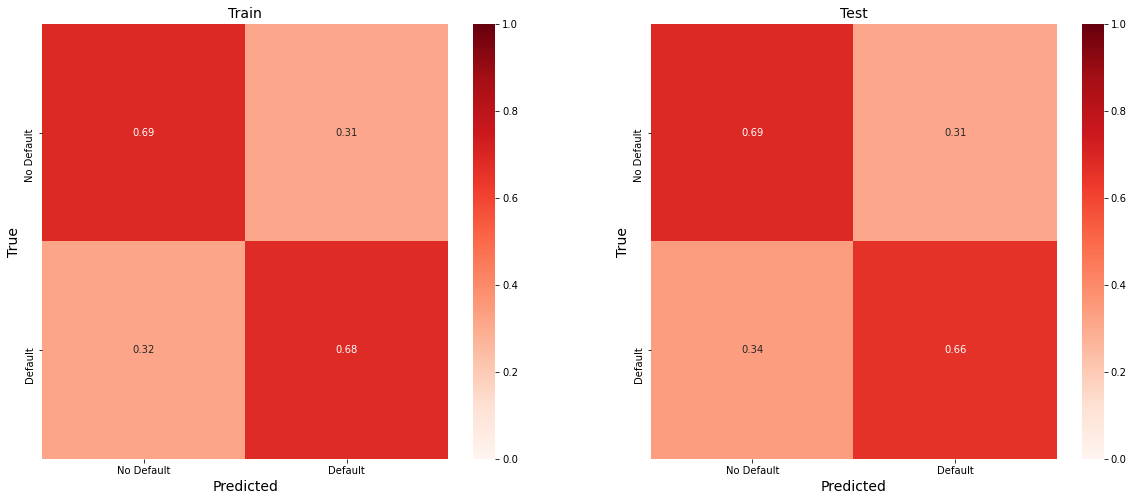

In [61]:
results = [logit_scores]
names = ['Baseline LR']
for (name, classifier) in classifiers:
        # Print classifier and parameters
        print('****** START', name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("predictor", classifier)
        ])
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        grid_search = GridSearchCV(full_pipeline_with_predictor, params, cv=5, 
                                   n_jobs=-1,verbose=1)
        grid_search.fit(X_train, y_train)
                
        # Best estimator score
        best_train = pct(grid_search.best_score_)

        # Best estimator fitting time
        start = time()
        model = grid_search.best_estimator_.fit(X_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time() - start, 4)

        # Best train scores
        best_train_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train,cv=cvSplits)
        best_train_accuracy = pct(best_train_scores.mean())     
        results.append(best_train_scores)
        names.append(name)
        
        # Conduct t-test with baseline logit (control) and best estimator (experiment)
        (t_stat, p_value) = stats.ttest_rel(logit_scores, best_train_scores)
        
        # Create confusion matrix for the best model
        confusion_matrix_def(model,X_train,y_train,X_test,y_test)
        
        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",name," *****")
        print("")
        
        # Record the results
        exp_name = name
        expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
                [best_train_accuracy, 
                pct(accuracy_score(y_valid, model.predict(X_valid))),
                pct(accuracy_score(y_test, model.predict(X_test))),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train)),
                f1_score(y_test, model.predict(X_test)),
                log_loss(y_train, model.predict(X_train)),
                log_loss(y_test, model.predict(X_test)),
                p_value
                ],4)) + [train_time,test_time] \
                + [json.dumps(param_dump)]

## Boxplot with all CV results

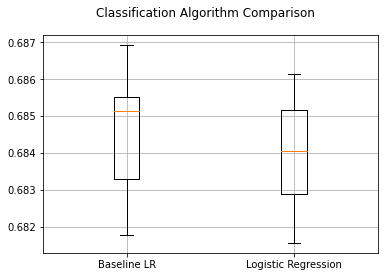

In [62]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Classification Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.grid()
pyplot.show()

## Final results
<a id='exp results'></a>

In [63]:
pd.set_option('display.max_colwidth', None)
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_38_features     91.894     91.907     91.848     0.7453   
1  Baseline_38_features     68.453     67.658     68.685     0.7485   
2   Logistic Regression     68.401     67.509     68.753     0.7481   

   Valid AUC  Test  AUC  Train F1 Score  Test F1 Score  Train Log Loss  \
0     0.7364     0.7369          0.0233         0.0203          2.8055   
1     0.7380     0.7369          0.6840         0.2543         10.8876   
2     0.7380     0.7369          0.6830         0.2553         10.9104   

   Test Log Loss  P Score  Train Time  Test Time  \
0         2.8157    0.000    162.8113     0.2187   
1        10.8161    0.000    555.3523     0.2382   
2        10.7925    0.003     70.2054     0.3798   

                                                                            Description  
0        Imbalanced Logistic reg features 38:   Num:31,    Cat:7 with 20% training data  
1  Untuned Balanced Logistic reg features 38:   Num:31,    Cat:7 with 30% training data  
2      [["predictor__C", 10], ["predictor__penalty", "l1"], ["predictor__tol", 0.0001]]

# Kaggle submission

## Best Pipeline for submission

In [64]:
%%time 
np.random.seed(42)
final_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression(solver='saga', n_jobs=-1, random_state=42,
                                        penalty='l1',
                                        tol=.0001,
                                        C=10 
                                        ))
    ])

CPU times: user 2.14 ms, sys: 0 ns, total: 2.14 ms
Wall time: 2.23 ms


In [65]:
final_X_train = finaldf[0][selected_features]
final_y_train = finaldf[0]['TARGET']
start = time()
final_pipeline.fit(final_X_train, final_y_train)
train_time = round(time() - start, 4)

In [70]:
exp_name = "Best estimator with full train data"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
                [pct(accuracy_score(final_y_train, model.predict(final_X_train))),
                0, 
                0,
                roc_auc_score(final_y_train, model.predict_proba(final_X_train)[:, 1]),
                0,
                 0,
                f1_score(final_y_train, model.predict(final_X_train)),
                0,
                log_loss(final_y_train, model.predict(final_X_train)),
                0,0],4)) + [train_time,0] \
                + [json.dumps(param_dump)]
expLog


exp_name  Train Acc  Valid Acc  Test  Acc  \
0                 Baseline_38_features     91.894     91.907     91.848   
1                 Baseline_38_features     68.453     67.658     68.685   
2                  Logistic Regression     68.401     67.509     68.753   
3  Best estimator with full train data     68.582      0.000      0.000   

   Train AUC  Valid AUC  Test  AUC  Train F1 Score  Test F1 Score  \
0     0.7453     0.7364     0.7369          0.0233         0.0203   
1     0.7485     0.7380     0.7369          0.6840         0.2543   
2     0.7481     0.7380     0.7369          0.6830         0.2553   
3     0.7430     0.0000     0.0000          0.2579         0.0000   

   Train Log Loss  Test Log Loss  P Score  Train Time  Test Time  \
0          2.8055         2.8157    0.000    162.8113     0.2187   
1         10.8876        10.8161    0.000    555.3523     0.2382   
2         10.9104        10.7925    0.003     70.2054     0.3798   
3         10.8517         0.0000    0.000     68.7502     0.0000   

                                                                            Description  
0        Imbalanced Logistic reg features 38:   Num:31,    Cat:7 with 20% training data  
1  Untuned Balanced Logistic reg features 38:   Num:31,    Cat:7 with 30% training data  
2      [["predictor__C", 10], ["predictor__penalty", "l1"], ["predictor__tol", 0.0001]]  
3      [["predictor__C", 10], ["predictor__penalty", "l1"], ["predictor__tol", 0.0001]]

## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [71]:
test_class_scores = final_pipeline.predict_proba(X_kaggle_test)[:, 1]

In [72]:
test_class_scores[0:10]

array([0.06137696, 0.21110864, 0.02762278, 0.04052308, 0.11541908,
       0.04210505, 0.0298461 , 0.0777353 , 0.01202733, 0.11565393])

In [73]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

SK_ID_CURR    TARGET
0      100001  0.061377
1      100005  0.211109
2      100013  0.027623
3      100028  0.040523
4      100038  0.115419

In [74]:
submit_df.to_csv("submission.csv",index=False)

# Kaggle submission via the command line API

In [75]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

100%|#######################################| 1.26M/1.26M [00:02<00:00, 517kB/s]
Successfully submitted to Home Credit Default Risk

## Report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

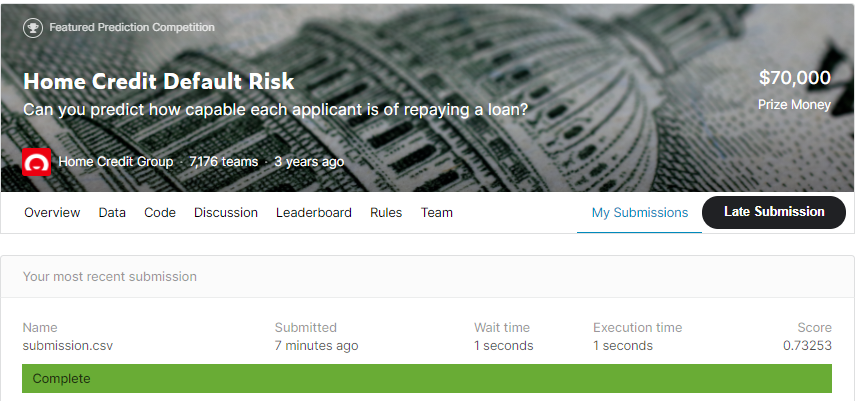

# Write-up 


## Abstract

The goal of this project is to build a machine learning model to predict the customer behavior on repayment of the loan. 

In Phase-1 of this project we created an outline with basic EDA on all datasets, baseline pipeline and selected metrics. Detailed statistical anaysis on the categorical and numeric features and visual exploration of the features were performed inturn to use in the base pipeline model. One problem we always want lookout when doing EDA is anomalies, missing data & imbalanced data. Further feature engineering of the highly correlated features helped us evaluate better baseline.

Our results in phase-1 shows the difference between Imbalanced untuned, Balanced untuned and tuned algorithms is statistically significant & the predictive ability of the tuned algorithm only increases training accuracy for the balanced dataset by 0.18%, resulting in a final training accuracy of 68.52% and training AOC 74.3%.

Our ROC_AUC score for Kaggle submission was 0.73253.

## Project Description

Home Credit is an international non-bank financial institution, which primarily focuses on lending people money regardless of their credit history. Home credit groups aim to provide positive borrowing experience to customers, who do not bank on traditional sources. Hence, Home Credit Group published a dataset on Kaggle website with the objective of identifying and solving unfair loan rejection.

The goal of this project is to build a machine learning model to predict the customer behavior on repayment of loan. Our task would be to create a pipeline to build a baseline machine learning model using logistic regression classification algorithms. The final model will be evaluated with various performance metrics to build a better model. Businesses will be able to use the output of the model to identify if loan is at risk to default. The new model built will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

The results of our machine learning pipelines will be measured using the follwing metrics;

- Confusion Matrix
- Accuracy Score
- Precision
- Recall
- F1 score
- AUC (Area Under ROC Curve)

The pipeline results will be logged, compared and ranked using the appropriate measurements. The most efficient pipeline will be submitted to the HCDR Kaggle Competition.

**Workflow**

For this project, we are following the proposed workflow as mentioned in Phase-0 of this project.

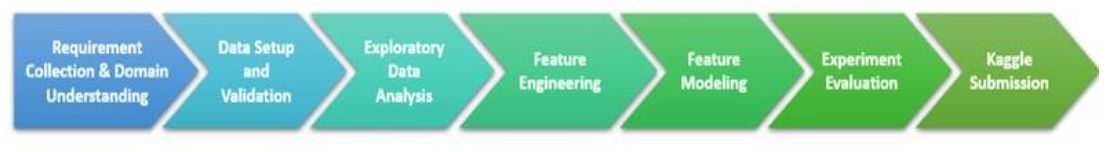

## Data Description
Overview
The full dataset consists of 7 tables. There is 1 primary table and 6 secondary tables. 

## Primary Tables <br>

1. **application_train** <br>
This Primary table includes the application information for each loan application at Home Credit in one row. This row includes the target variable of whether or not the loan was repaid. We use this field as the basis to determine the feature importance. The target variable is binary in nature based since this is a classification problem. <br>

- '1' - client with payment difficulties: he/she had late payment more than N days on at least one of the first M installments of the loan in our sample <br>
- '0' - all other cases <br>
The number of variables are 122. The number of data entries are 307,511

2. **application_test** <br>
This table includes the application information for each loan application at Home Credit in one row. The features are the same as the train data but exclude the target variable <br>
The number of variables are 121. The number of data entries are 48,744.

## Secondary Tables <br>

1. **Bureau** <br>
This table includes all previous credits received by a customer from other financial institutions prior to their loan application. There is one row for each previous credit, meaning a many-to-one relationship with the primary table. We could join it with primary table by using current application ID, SK_ID_CURR. <br>
The number of variables are 17.The number of data entries are 1,716,428.

2. **Bureau Balance** <br>
This table includes the monthly balance for a previous credit at other financial institutions. There is one row for each monthly balance, meaning a many-to-one relationship with the Bureau table. We could join it with bureau table by using bureau's ID, SK_ID_BUREAU. <br>
The number of variables are 3. The number of data entries are 27,299,925

3. **Previous Application** <br>
This table includes previous applications for loans made by the customer at Home Credit. There is one row for each previous application, meaning a many-to-one relationship with the primary table. We could join it with primary table by using current application ID, SK_ID_CURR. <br>
There are four types of contracts: <br>
a. Consumer loan(POS – Credit limit given to buy consumer goods) <br>
b. Cash loan(Client is given cash) <br>
c. Revolving loan(Credit) <br>
d. XNA (Contract type without values) <br>
The number of variables are 37. The number of data entries are 1,670,214

4. **POS CASH Balance** <br>
This table includes a monthly balance snapshot of a previous point of sale or cash loan that the customer has at Home Credit. There is one row for each monthly balance, meaning a many-to-one relationship with the Previous Application table. We would  join it with Previous Application table by using previous application ID, SK_ID_PREV, then join it with primary table by using current application ID, SK_ID_CURR. <br>
The number of variables are 8. The number of data entries are 10,001,358

5. **Credit Card Balance** <br>
This table includes a monthly balance snapshot of previous credit cards the customer has with Home Credit. There is one row for each previous monthly balance, meaning a many-to-one relationship with the Previous Application table.We could join it with Previous Application table by using previous application ID, SK_ID_PREV, then join it with primary table by using current application ID, SK_ID_CURR. <br>
The number of variables are 23. The number of data entries are 3,840,312

6. **Installments Payments** <br>
This table includes previous repayments made or not made by the customer on credits issued by Home Credit. There is one row for each payment or missed payment, meaning a many-to-one relationship with the Previous Application table. We would join it with Previous Application table by using previous application ID, SK_ID_PREV, then join it with primary table by using current application ID, SK_ID_CURR. <br>
The number of variables are 8 . The number of data entries are 13,605,401


## EDA

Exploratory Data Analysis is valuable to this project since it allows us to get closer to the certainty that the future results will be valid, accurately interpreted, and applicable to the proposed solution. 

In phase 1 for this project this step involves looking at the summary statistics for each individual table in the model and focusing on the missing data , distribution and its central tendencies such as mean, median, count, min, max and the interquartile ranges. 

Categorical and numerical features were looked at to identify anamolies in the data. Specific features were chosen to be visualized based on the correlation and distribution. The highly correlated features were used to plot the density to evaluate the distributions in comparison to the target.

Please refer section for EDA [Exploratory Data Analysis](#EDA Section)

## Feature Engineering and transformers

Feature engineering is a crucial part of machine learning and requires expert domain knowledge to achieve a great quality machine learning model. New features were created, based on aggregated functions including min, max, mean, sum and count. This was done for all the input files. As a part of this process the new features from the secondary files were merged with the primary table “application_train”. This resulted in a set of 170 features. Further, the top 20 highly correlated features (positive and negative) were chosen. These features were then classified into numerical and categorical variables to form inputs for 2 individual pipelines. Some features engineered were: prevApps_AMT_APPLICATION_max, 'bureau_AMT_CREDIT_SUM_max', ef_INCOME_CREDIT_PERCENT, ef_FAM_MEMBER_INCOME,ef_ANN_INCOME_PERCENT

(Please see section Correlation Map of Numerical Variables [Correlation Analysis](#correlation) and Add New Features[Feature Aggregator](#newfeature))

## Pipelines
Logistic regression model is used as a baseline Model, since it's easy to implement yet provides great efficiency. Training a logistic regression model doesn't require high computation power. We also tuned the regularization, tolerance, and C hyper parameters for the Logistic regression model and compared the results with the baseline model. We used 15 fold cross fold validation with hyperparameters to tune the model and apply GridSearchCV function in Sklearn. 

Below is the workflow for the model pipeline.

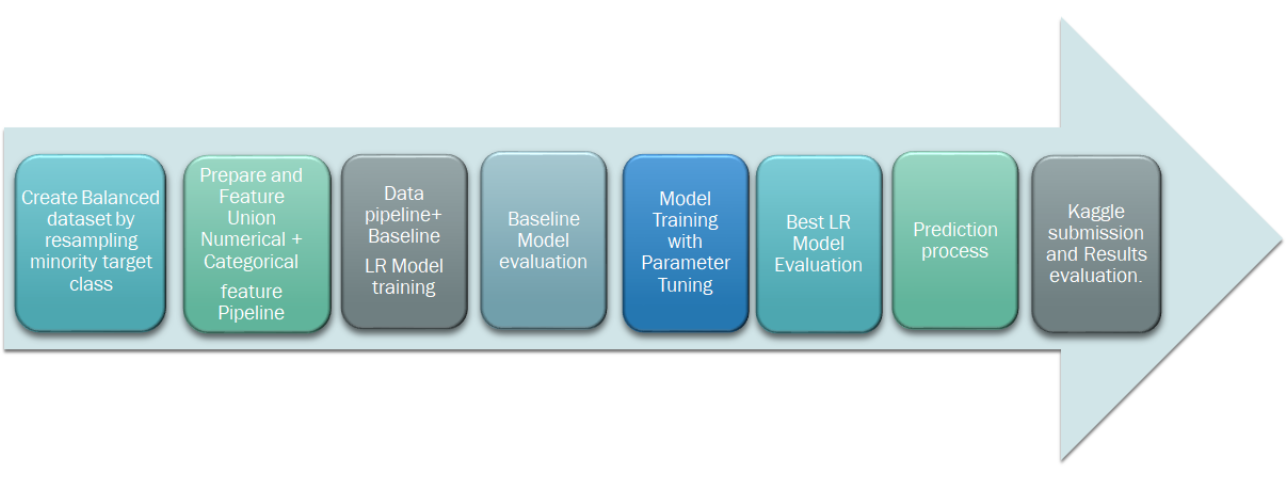

1. Balance the minority target class("Default") data by resampling and split the data with Cross-fold validation
2. Create a data pipeline with highly correlated numerical and categorical features. There were totally 38 features selected after aggregation and feature engineering. We had 31 numerical features and 7 categorical features.
3. Impute missing numerical attribute with mean values and categorical values with most frequent values
4. Apply FeatureUnion to combine both numerical and Categorical features
5. Create a model with a data pipeline and baseline model to test both balanced and imbalanced training dataset.
6. Evaluate the model with Accuracy score, F1 score, Logloss and AUC score for train,validation and test set. Record the log results in dataframe.
7. Perform GridSearch to tune the Logistic Regression model with regularization('l1', 'l2'), tolerance(0.0001, 0.00001, 0.0000001), and C(10, 1, 0.1, 0.01) hyper parameters
8. Gridsearch uses the shuffled 15 fold cross validation subsets to execute the pipeline including the data preparation and classification algorithms
9. Record the results after executing grid search, find the best estimator based on accuracy scores and report the corresponding score, fitting time and prediction time.
10. Total 4 expirements were conducted to comeup with best baseline model. Please refer section [Final results](#exp results)

## Experimental results
Below is the resulting table for the three baseline that we performed on the given dataset. Please refer section [Final results](#exp results)

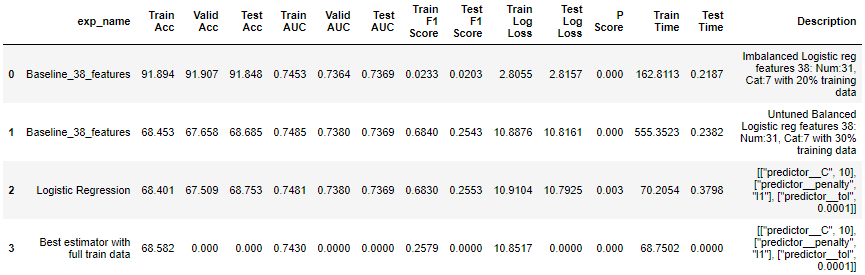


## Discussion of Results
In the first experiment we had imbalanced data which resulted in high Training accuracy i.e around 91.9% and test accuracy as 91.85%. After generating the confusion matrix, we could see that the reason for high accuracy was due to very low data samples for default class.Accuracy score was not a proper metric to measure the imbalanced data and that led us into balance the data and test again.

Misconception of imbalanced data results led us to resample of minority data, so that we have both the classes evened out for much reliable accuracy. The training accuracy with a balanced data set now came out to 68.45% and test accuracy as 68.68%. The Test AUC slightly came better than the previous model around 73.69%.

Our final baseline is based on the best hyper parameters for the logistic regression and the training accuracy came around 68.4% and the training AUC score as 74.81. We used the final model to run the whole one third of training data and got the training accuracy as 	68.58% and train ACU score as 74.3%.

We used the baseline model with best hyper parameters for Kaggle submission as this had better test accuracy and AUC. 

## Conclusion

In HCDR project, we are using Home Credit’s data to better predict repayment of a loan by a customer with little/no credit history, has a real-world impact. Providing credits to people who are credible and in need helps upscale people livelihood.

In this phase of our project we has exhibited a environment to ingest Home Credit’s data, analyze the dataset features, transform and engineer the best parameters, and test machine learning algorithms. Our workflow will allow us to obtain a tuned algorithm with a statistically significant increase in performance compared to untuned logistic regression.

During phase-1 we tested using tuned logistic regression on balanced dataset. Our results are promising as the tuned algorithm was statistically significant (p_value = 0.003), however we believe that in future phases we will obtain models with better performance by engineering additional features and testing additional tuned algorithms.


## Problems faced
In this phase a simple feature extraction and engineering was implemented considering the individual tables and the correlations to the target. The problem encountered apart from the accuracy of the base model include:

1. Lack of a more complex feature engineering to improve the efficiency of the feature extraction
2. An unstable platform for running Machine Learning Models and collaboration 
3. Long running models for KNN (Model eventaully crashed due to shortage of memory we couldn't produce results for this algorithm)
4. Basic Resampling method using logistic regression which lead to only about 70% accuracy.

## Kaggle Submission
Below is the screenshot of our best kaggle submission.   

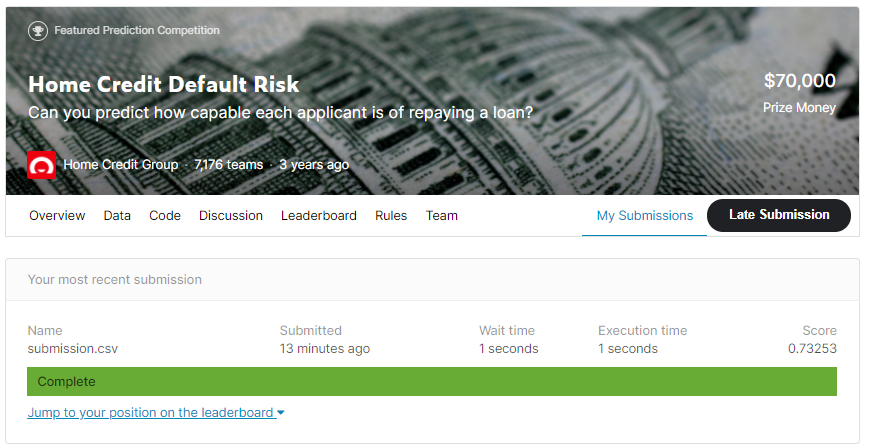


# References

Some of the material in this notebook has been adopted from following 

1. https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook
2. https://towardsdatascience.com/a-machine-learning-approach-to-credit-risk-assessment-ba8eda1cd11f
3. https://juhiramzai.medium.com/introduction-to-credit-risk-modeling-e589d6914f57
4. https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html
5. https://stackoverflow.com/questions/28930465/what-is-the-difference-between-flatten-and-ravel-functions-in-numpy


#  TODO: Predicting Loan Repayment with Automated Feature Engineering in Featuretools

Read the following:
* feature engineering via Featuretools library: 
  * https://github.com/Featuretools/predict-loan-repayment/blob/master/Automated%20Loan%20Repayment.ipynb
* https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/
* feature engineering paper: https://dai.lids.mit.edu/wp-content/uploads/2017/10/DSAA_DSM_2015.pdf
* https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/

The assumptions that were made in Phase 0 was that the data was balanced and there would be less anamolies. The accuracy of the baseline model used, which was logistic regression, would be sufficient to handle the data loaded. 

In the next phase we plan to mitigate these problems by using more aggregated features with extensive EDA performed. The performance can be boosted using GPU's and Pytorch can be explored to leverage higher compute power. We also plan to leverage optimized coding techniques for a better performance. Additionally github can be used for collaboration for better versioning and merging of the notebooks.